# Hierarchical GANs for morphological and geometric trees

## Imports

In [2]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local
import McNeuron
import models_cmc as models
import train_cmc as train
import batch_utils
import data_transforms

## Example neuron

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


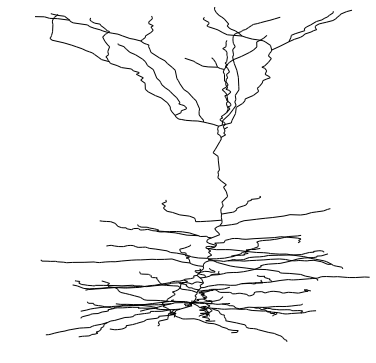

In [3]:
neuron_list = McNeuron.visualize.get_all_path(os.getcwd()+"/Data/Pyramidal/chen")
neuron = McNeuron.Neuron(file_format = 'swc', input_file=neuron_list[50])
McNeuron.visualize.plot_2D(neuron)

## Training

### Load Data

In [4]:
#training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/synthetic_two_segment_model_different_directions_n20.p", "rb"))
training_data = pickle.load(open("/Volumes/Arch/Dropbox/HG-GAN/03-Data/synthetic_Two_segment_model_Different_directions_Parent_distance_n20.p", "rb"))

In [5]:
print training_data['morphology']['n20'].shape
print training_data['geometry']['n20'].shape

(50000, 18)
(50000, 19, 3)


### Global parameters

In [6]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 64
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 20
lr_discriminator =  0.005
lr_generator = 0.0005

rule = 'mgd'
weight_constraint = [-0.03, 0.03]

### Run


Level #0

    Epoch #0

    After 20 iterations
        Discriminator Loss                         = -3.50202727318

    Generator_Loss: 3.98931503296
2
    After 20 iterations
        Discriminator Loss                         = -2.79471468925

    Generator_Loss: 1.24642419815
3
    After 20 iterations
        Discriminator Loss                         = -2.61006212234

    Generator_Loss: 0.855859816074
4
    After 20 iterations
        Discriminator Loss                         = -2.30454993248

    Generator_Loss: 0.195644766092
5
    After 20 iterations
        Discriminator Loss                         = -2.17177200317

    Generator_Loss: -0.286078721285
6
    After 20 iterations
        Discriminator Loss                         = -1.88929271698

    Generator_Loss: -0.548039853573
7
    After 20 iterations
        Discriminator Loss                         = -2.05525493622

    Generator_Loss: -0.588996887207
8
    After 20 iterations
        Discriminator Loss              

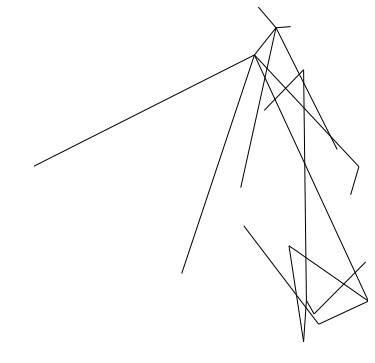

    After 20 iterations
        Discriminator Loss                         = -1.19150769711

    Generator_Loss: 0.56109470129
26
    After 20 iterations
        Discriminator Loss                         = -1.03509521484

    Generator_Loss: 0.426610380411
27
    After 20 iterations
        Discriminator Loss                         = -1.16007709503

    Generator_Loss: 0.560094892979
28
    After 20 iterations
        Discriminator Loss                         = -0.85914260149

    Generator_Loss: 0.444233506918
29
    After 20 iterations
        Discriminator Loss                         = -1.18001127243

    Generator_Loss: 0.45601695776
30
    After 20 iterations
        Discriminator Loss                         = -1.0676150322

    Generator_Loss: 0.369413673878
31
    After 20 iterations
        Discriminator Loss                         = -0.898879289627

    Generator_Loss: 0.185644641519
32
    After 20 iterations
        Discriminator Loss                         = -1.13804

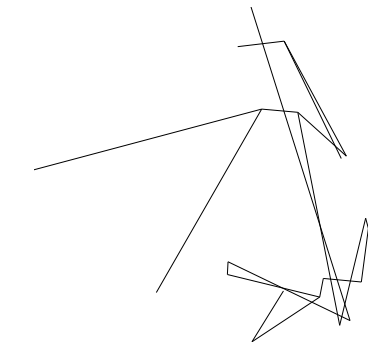

    After 20 iterations
        Discriminator Loss                         = -0.938736081123

    Generator_Loss: 0.351297080517
51
    After 20 iterations
        Discriminator Loss                         = -0.772809028625

    Generator_Loss: 0.0502831041813
52
    After 20 iterations
        Discriminator Loss                         = -0.649267733097

    Generator_Loss: 0.100127600133
53
    After 20 iterations
        Discriminator Loss                         = -0.738341748714

    Generator_Loss: 0.261920660734
54
    After 20 iterations
        Discriminator Loss                         = -0.685685217381

    Generator_Loss: 0.0729187950492
55
    After 20 iterations
        Discriminator Loss                         = -0.619799673557

    Generator_Loss: -0.0732370465994
56
    After 20 iterations
        Discriminator Loss                         = -0.715979993343

    Generator_Loss: -0.197578862309
57
    After 20 iterations
        Discriminator Loss                     

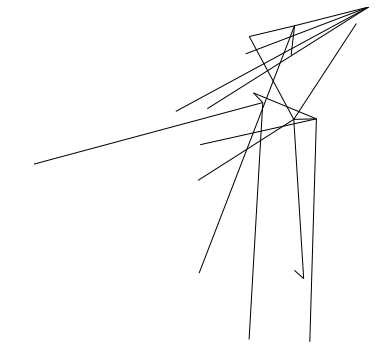

    After 20 iterations
        Discriminator Loss                         = -0.40150859952

    Generator_Loss: -0.573316156864
76
    After 20 iterations
        Discriminator Loss                         = -0.358234286308

    Generator_Loss: -0.634081125259
77
    After 20 iterations
        Discriminator Loss                         = -0.746489822865

    Generator_Loss: -0.67353117466
78
    After 20 iterations
        Discriminator Loss                         = -0.439392775297

    Generator_Loss: -0.669691324234
79
    After 20 iterations
        Discriminator Loss                         = -0.523831069469

    Generator_Loss: -0.412541776896
80
    After 20 iterations
        Discriminator Loss                         = -0.390069633722

    Generator_Loss: -0.684139609337
81
    After 20 iterations
        Discriminator Loss                         = -0.462157040834

    Generator_Loss: -0.843890011311
82
    After 20 iterations
        Discriminator Loss                     

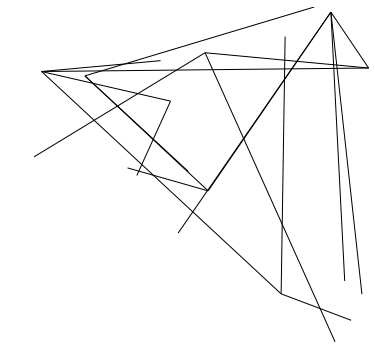

    After 20 iterations
        Discriminator Loss                         = -0.504141271114

    Generator_Loss: -0.463943660259
101
    After 20 iterations
        Discriminator Loss                         = -0.293039470911

    Generator_Loss: -0.59004420042
102
    After 20 iterations
        Discriminator Loss                         = -0.318589955568

    Generator_Loss: -0.646572113037
103
    After 20 iterations
        Discriminator Loss                         = -0.238095000386

    Generator_Loss: -0.280294507742
104
    After 20 iterations
        Discriminator Loss                         = -0.397647410631

    Generator_Loss: 0.0393964312971
105
    After 20 iterations
        Discriminator Loss                         = -0.251908481121

    Generator_Loss: -0.193482860923
106
    After 20 iterations
        Discriminator Loss                         = -0.251848101616

    Generator_Loss: -0.40559014678
107
    After 20 iterations
        Discriminator Loss              

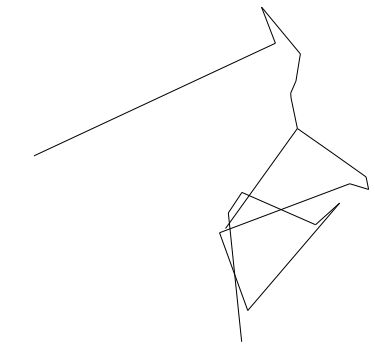

    After 20 iterations
        Discriminator Loss                         = -0.169094055891

    Generator_Loss: -0.653546214104
126
    After 20 iterations
        Discriminator Loss                         = -0.256463199854

    Generator_Loss: -0.580384969711
127
    After 20 iterations
        Discriminator Loss                         = -0.292581439018

    Generator_Loss: -0.600295007229
128
    After 20 iterations
        Discriminator Loss                         = -0.309389352798

    Generator_Loss: -0.640723526478
129
    After 20 iterations
        Discriminator Loss                         = -0.293398112059

    Generator_Loss: -0.787598192692
130
    After 20 iterations
        Discriminator Loss                         = -0.127897426486

    Generator_Loss: -0.913615465164
131
    After 20 iterations
        Discriminator Loss                         = -0.265165179968

    Generator_Loss: -1.04153811932
132
    After 20 iterations
        Discriminator Loss             

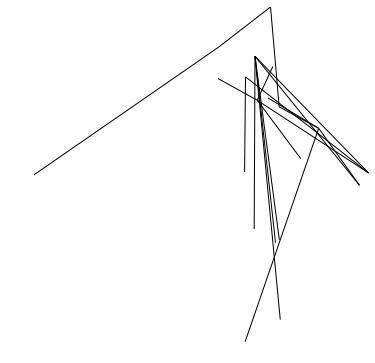

    After 20 iterations
        Discriminator Loss                         = -0.134273201227

    Generator_Loss: -0.438648402691
151
    After 20 iterations
        Discriminator Loss                         = -0.171775698662

    Generator_Loss: -0.441360712051
152
    After 20 iterations
        Discriminator Loss                         = -0.133982151747

    Generator_Loss: -0.36254298687
153
    After 20 iterations
        Discriminator Loss                         = -0.051871702075

    Generator_Loss: -0.22230990231
154
    After 20 iterations
        Discriminator Loss                         = -0.257595300674

    Generator_Loss: -0.168472751975
155
    After 20 iterations
        Discriminator Loss                         = -0.178039610386

    Generator_Loss: -0.162531539798
156
    After 20 iterations
        Discriminator Loss                         = -0.130809694529

    Generator_Loss: -0.305954575539
157
    After 20 iterations
        Discriminator Loss              

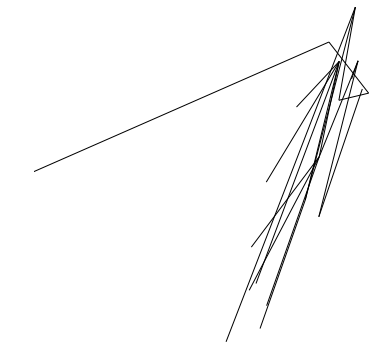

    After 20 iterations
        Discriminator Loss                         = -0.170079097152

    Generator_Loss: -0.164393588901
176
    After 20 iterations
        Discriminator Loss                         = -0.25461819768

    Generator_Loss: -0.10387390852
177
    After 20 iterations
        Discriminator Loss                         = -0.149370804429

    Generator_Loss: -0.0708458349109
178
    After 20 iterations
        Discriminator Loss                         = -0.156602814794

    Generator_Loss: -0.178710624576
179
    After 20 iterations
        Discriminator Loss                         = -0.195866197348

    Generator_Loss: -0.221636474133
180
    After 20 iterations
        Discriminator Loss                         = -0.230164334178

    Generator_Loss: -0.306686133146
181
    After 20 iterations
        Discriminator Loss                         = -0.111036680639

    Generator_Loss: -0.360752761364
182
    After 20 iterations
        Discriminator Loss             

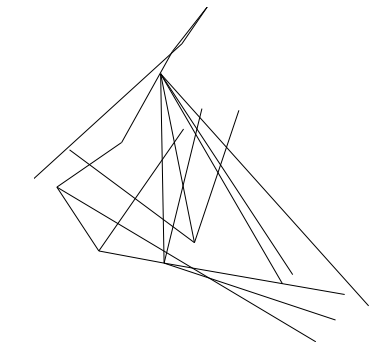

    After 20 iterations
        Discriminator Loss                         = -0.0697142928839

    Generator_Loss: -0.377992808819
201
    After 20 iterations
        Discriminator Loss                         = -0.129005149007

    Generator_Loss: -0.454231828451
202
    After 20 iterations
        Discriminator Loss                         = -0.124561078846

    Generator_Loss: -0.507401108742
203
    After 20 iterations
        Discriminator Loss                         = -0.0911619737744

    Generator_Loss: -0.434880524874
204
    After 20 iterations
        Discriminator Loss                         = -0.131747603416

    Generator_Loss: -0.337125688791
205
    After 20 iterations
        Discriminator Loss                         = -0.172527387738

    Generator_Loss: -0.179066583514
206
    After 20 iterations
        Discriminator Loss                         = -0.136981651187

    Generator_Loss: 0.00034706707811
207
    After 20 iterations
        Discriminator Loss         

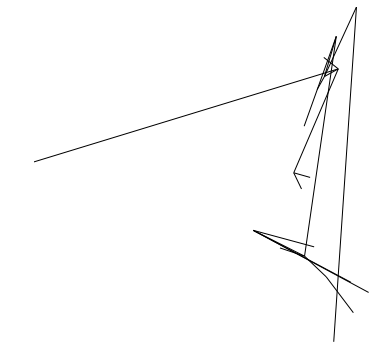

    After 20 iterations
        Discriminator Loss                         = -0.144400730729

    Generator_Loss: -0.0196850970387
226
    After 20 iterations
        Discriminator Loss                         = -0.225297436118

    Generator_Loss: 0.138011872768
227
    After 20 iterations
        Discriminator Loss                         = -0.185954898596

    Generator_Loss: 0.144675701857
228
    After 20 iterations
        Discriminator Loss                         = -0.155894547701

    Generator_Loss: 0.066157028079
229
    After 20 iterations
        Discriminator Loss                         = -0.264993220568

    Generator_Loss: -0.0348202325404
230
    After 20 iterations
        Discriminator Loss                         = -0.223357900977

    Generator_Loss: -0.0897679552436
231
    After 20 iterations
        Discriminator Loss                         = -0.185929372907

    Generator_Loss: -0.225190803409
232
    After 20 iterations
        Discriminator Loss            

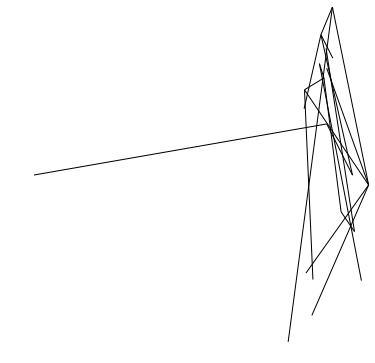

    After 20 iterations
        Discriminator Loss                         = -0.0953732207417

    Generator_Loss: -0.23486533761
251
    After 20 iterations
        Discriminator Loss                         = -0.129531919956

    Generator_Loss: -0.251154929399
252
    After 20 iterations
        Discriminator Loss                         = -0.0625684186816

    Generator_Loss: -0.277172297239
253
    After 20 iterations
        Discriminator Loss                         = -0.160903930664

    Generator_Loss: -0.299267590046
254
    After 20 iterations
        Discriminator Loss                         = -0.171560972929

    Generator_Loss: -0.265484392643
255
    After 20 iterations
        Discriminator Loss                         = -0.0538737699389

    Generator_Loss: -0.144703134894
256
    After 20 iterations
        Discriminator Loss                         = -0.16328778863

    Generator_Loss: -0.0553645305336
257
    After 20 iterations
        Discriminator Loss          

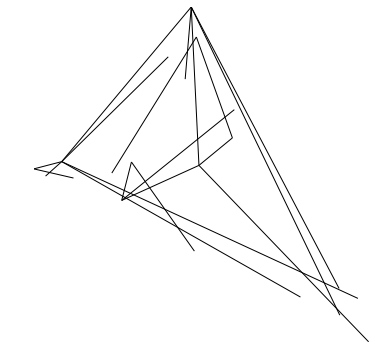

    After 20 iterations
        Discriminator Loss                         = -0.173723340034

    Generator_Loss: 0.0493133589625
276
    After 20 iterations
        Discriminator Loss                         = -0.076079569757

    Generator_Loss: 0.0939230248332
277
    After 20 iterations
        Discriminator Loss                         = -0.160534948111

    Generator_Loss: 0.101817376912
278
    After 20 iterations
        Discriminator Loss                         = -0.150309577584

    Generator_Loss: 0.0776895135641
279
    After 20 iterations
        Discriminator Loss                         = -0.117016419768

    Generator_Loss: 0.0122555214912
280
    After 20 iterations
        Discriminator Loss                         = -0.10137244314

    Generator_Loss: -0.077442266047
281
    After 20 iterations
        Discriminator Loss                         = -0.172815412283

    Generator_Loss: -0.0397806577384
282
    After 20 iterations
        Discriminator Loss             

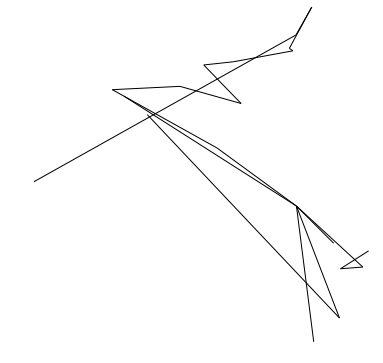

    After 20 iterations
        Discriminator Loss                         = -0.212597802281

    Generator_Loss: 0.157965242863
301
    After 20 iterations
        Discriminator Loss                         = -0.220903545618

    Generator_Loss: 0.171912968159
302
    After 20 iterations
        Discriminator Loss                         = -0.077015131712

    Generator_Loss: 0.11981407553
303
    After 20 iterations
        Discriminator Loss                         = -0.178250715137

    Generator_Loss: 0.0855105668306
304
    After 20 iterations
        Discriminator Loss                         = -0.0573371574283

    Generator_Loss: 0.160437747836
305
    After 20 iterations
        Discriminator Loss                         = -0.145711004734

    Generator_Loss: 0.298035562038
306
    After 20 iterations
        Discriminator Loss                         = -0.141152873635

    Generator_Loss: 0.457417100668
307
    After 20 iterations
        Discriminator Loss                  

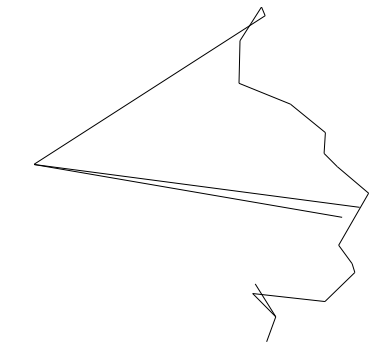

    After 20 iterations
        Discriminator Loss                         = -0.144296437502

    Generator_Loss: -0.227460667491
326
    After 20 iterations
        Discriminator Loss                         = -0.0919186398387

    Generator_Loss: -0.12601543963
327
    After 20 iterations
        Discriminator Loss                         = -0.163474991918

    Generator_Loss: -0.0553047545254
328
    After 20 iterations
        Discriminator Loss                         = -0.132401242852

    Generator_Loss: 0.00944304186851
329
    After 20 iterations
        Discriminator Loss                         = -0.0634833872318

    Generator_Loss: 0.136364355683
330
    After 20 iterations
        Discriminator Loss                         = -0.164969816804

    Generator_Loss: 0.164053872228
331
    After 20 iterations
        Discriminator Loss                         = -0.285606145859

    Generator_Loss: 0.213710978627
332
    After 20 iterations
        Discriminator Loss            

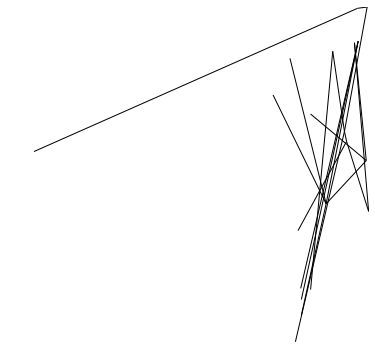

    After 20 iterations
        Discriminator Loss                         = -0.135616660118

    Generator_Loss: -0.185734212399
351
    After 20 iterations
        Discriminator Loss                         = -0.0373355075717

    Generator_Loss: -0.102232001722
352
    After 20 iterations
        Discriminator Loss                         = -0.124192357063

    Generator_Loss: 0.0280054043978
353
    After 20 iterations
        Discriminator Loss                         = -0.0686044543982

    Generator_Loss: 0.113683976233
354
    After 20 iterations
        Discriminator Loss                         = -0.0962272584438

    Generator_Loss: 0.220248132944
355
    After 20 iterations
        Discriminator Loss                         = 0.0106881214306

    Generator_Loss: 0.195284321904
356
    After 20 iterations
        Discriminator Loss                         = -0.109099023044

    Generator_Loss: 0.192164763808
357
    After 20 iterations
        Discriminator Loss             

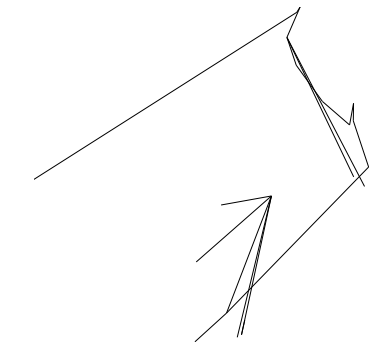

    After 20 iterations
        Discriminator Loss                         = -0.05683689937

    Generator_Loss: -0.28873026371
376
    After 20 iterations
        Discriminator Loss                         = -0.098514072597

    Generator_Loss: -0.200873523951
377
    After 20 iterations
        Discriminator Loss                         = -0.131553158164

    Generator_Loss: -0.147889047861
378
    After 20 iterations
        Discriminator Loss                         = -0.161278650165

    Generator_Loss: -0.0209781099111
379
    After 20 iterations
        Discriminator Loss                         = -0.153667971492

    Generator_Loss: -0.00678596552461
380
    After 20 iterations
        Discriminator Loss                         = -0.108496211469

    Generator_Loss: -0.00363925425336
381
    After 20 iterations
        Discriminator Loss                         = -0.0759351626039

    Generator_Loss: -0.0312026664615
382
    After 20 iterations
        Discriminator Loss       

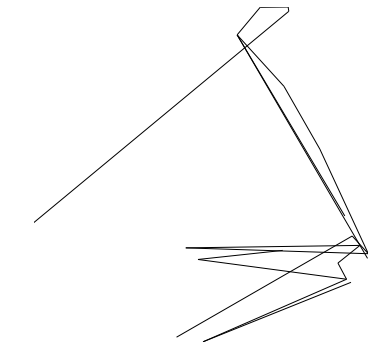

    After 20 iterations
        Discriminator Loss                         = -0.184484302998

    Generator_Loss: -0.152691528201
401
    After 20 iterations
        Discriminator Loss                         = -0.0495435707271

    Generator_Loss: -0.257178783417
402
    After 20 iterations
        Discriminator Loss                         = -0.0349870920181

    Generator_Loss: -0.256112843752
403
    After 20 iterations
        Discriminator Loss                         = -0.100011125207

    Generator_Loss: -0.34596145153
404
    After 20 iterations
        Discriminator Loss                         = -0.0576804168522

    Generator_Loss: -0.358380585909
405
    After 20 iterations
        Discriminator Loss                         = -0.0737854838371

    Generator_Loss: -0.328477263451
406
    After 20 iterations
        Discriminator Loss                         = -0.176461815834

    Generator_Loss: -0.318659931421
407
    After 20 iterations
        Discriminator Loss         

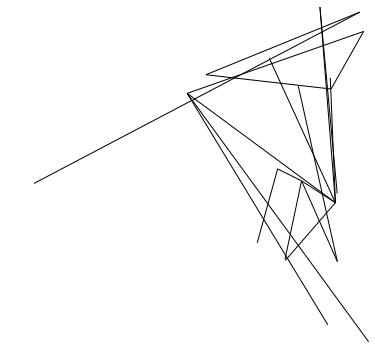

    After 20 iterations
        Discriminator Loss                         = -0.0177292656153

    Generator_Loss: -0.377385616302
426
    After 20 iterations
        Discriminator Loss                         = -0.114968679845

    Generator_Loss: -0.429457247257
427
    After 20 iterations
        Discriminator Loss                         = -0.0863541811705

    Generator_Loss: -0.391522020102
428
    After 20 iterations
        Discriminator Loss                         = -0.122377231717

    Generator_Loss: -0.422537267208
429
    After 20 iterations
        Discriminator Loss                         = -0.12862880528

    Generator_Loss: -0.421552091837
430
    After 20 iterations
        Discriminator Loss                         = -0.029616329819

    Generator_Loss: -0.362814605236
431
    After 20 iterations
        Discriminator Loss                         = -0.141080990434

    Generator_Loss: -0.230823889375
432
    After 20 iterations
        Discriminator Loss           

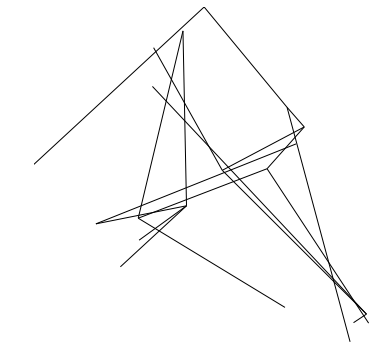

    After 20 iterations
        Discriminator Loss                         = -0.118667542934

    Generator_Loss: -0.297092109919
451
    After 20 iterations
        Discriminator Loss                         = -0.134916260839

    Generator_Loss: -0.358537495136
452
    After 20 iterations
        Discriminator Loss                         = -0.000712560315151

    Generator_Loss: -0.461532026529
453
    After 20 iterations
        Discriminator Loss                         = -0.0334249734879

    Generator_Loss: -0.552037000656
454
    After 20 iterations
        Discriminator Loss                         = -0.101132810116

    Generator_Loss: -0.584738850594
455
    After 20 iterations
        Discriminator Loss                         = -0.0923308059573

    Generator_Loss: -0.659263372421
456
    After 20 iterations
        Discriminator Loss                         = -0.0204817708582

    Generator_Loss: -0.587798297405
457
    After 20 iterations
        Discriminator Loss      

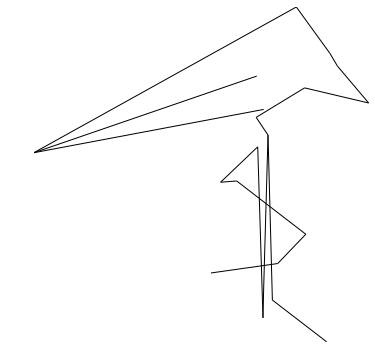

    After 20 iterations
        Discriminator Loss                         = -0.0748819634318

    Generator_Loss: -0.0775045156479
476
    After 20 iterations
        Discriminator Loss                         = -0.0434670522809

    Generator_Loss: -0.0872866287827
477
    After 20 iterations
        Discriminator Loss                         = -0.0237968787551

    Generator_Loss: -0.0987651646137
478
    After 20 iterations
        Discriminator Loss                         = -0.0997446775436

    Generator_Loss: -0.155159428716
479
    After 20 iterations
        Discriminator Loss                         = -0.1110079512

    Generator_Loss: -0.144599705935
480
    After 20 iterations
        Discriminator Loss                         = 0.0320312604308

    Generator_Loss: -0.126320540905
481
    After 20 iterations
        Discriminator Loss                         = -4.14560345234e-05

    Generator_Loss: -0.102828301489
482
    After 20 iterations
        Discriminator Loss    

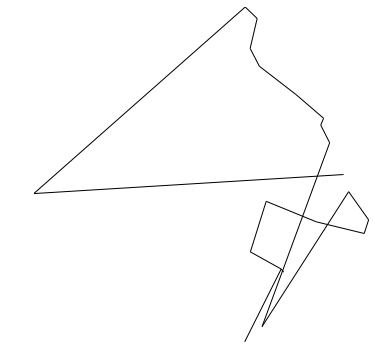

    After 20 iterations
        Discriminator Loss                         = -0.0767530575395

    Generator_Loss: -0.286752313375
501
    After 20 iterations
        Discriminator Loss                         = -0.0250458270311

    Generator_Loss: -0.23688711226
502
    After 20 iterations
        Discriminator Loss                         = -0.0915089249611

    Generator_Loss: -0.226482972503
503
    After 20 iterations
        Discriminator Loss                         = -0.0943552404642

    Generator_Loss: -0.270906686783
504
    After 20 iterations
        Discriminator Loss                         = -0.0881397873163

    Generator_Loss: -0.258624315262
505
    After 20 iterations
        Discriminator Loss                         = -0.0936804637313

    Generator_Loss: -0.150164559484
506
    After 20 iterations
        Discriminator Loss                         = -0.036005910486

    Generator_Loss: -0.15751427412
507
    After 20 iterations
        Discriminator Loss        

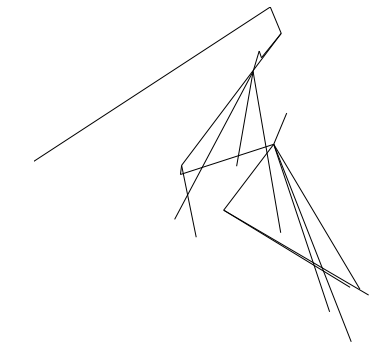

    After 20 iterations
        Discriminator Loss                         = -0.140615552664

    Generator_Loss: -0.102011725307
526
    After 20 iterations
        Discriminator Loss                         = -0.0752708390355

    Generator_Loss: -0.076711319387
527
    After 20 iterations
        Discriminator Loss                         = -0.185605660081

    Generator_Loss: -0.0626274496317
528
    After 20 iterations
        Discriminator Loss                         = -0.0141788227484

    Generator_Loss: -0.0481659509242
529
    After 20 iterations
        Discriminator Loss                         = -0.0831288993359

    Generator_Loss: -0.109825178981
530
    After 20 iterations
        Discriminator Loss                         = -0.167794451118

    Generator_Loss: -0.162495449185
531
    After 20 iterations
        Discriminator Loss                         = -0.0774288922548

    Generator_Loss: -0.183747753501
532
    After 20 iterations
        Discriminator Loss      

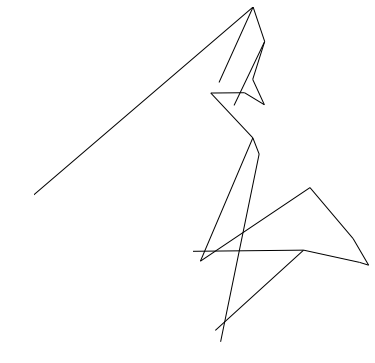

    After 20 iterations
        Discriminator Loss                         = -0.0352108702064

    Generator_Loss: -0.0103287575766
551
    After 20 iterations
        Discriminator Loss                         = -0.0359609387815

    Generator_Loss: 0.0778390914202
552
    After 20 iterations
        Discriminator Loss                         = -0.0922622159123

    Generator_Loss: 0.119481965899
553
    After 20 iterations
        Discriminator Loss                         = -0.0699913650751

    Generator_Loss: 0.138065695763
554
    After 20 iterations
        Discriminator Loss                         = -0.0530617497861

    Generator_Loss: 0.187344416976
555
    After 20 iterations
        Discriminator Loss                         = -0.0883928015828

    Generator_Loss: 0.242267563939
556
    After 20 iterations
        Discriminator Loss                         = -0.0982333570719

    Generator_Loss: 0.245376780629
557
    After 20 iterations
        Discriminator Loss         

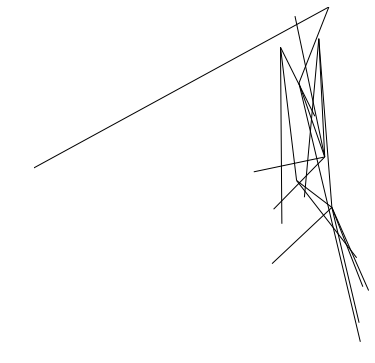

    After 20 iterations
        Discriminator Loss                         = -0.00596931250766

    Generator_Loss: -0.41438549757
576
    After 20 iterations
        Discriminator Loss                         = -0.0128267575055

    Generator_Loss: -0.294686734676
577
    After 20 iterations
        Discriminator Loss                         = 0.0140506336465

    Generator_Loss: -0.213070377707
578
    After 20 iterations
        Discriminator Loss                         = -0.0548760555685

    Generator_Loss: -0.120632231236
579
    After 20 iterations
        Discriminator Loss                         = -0.110083170235

    Generator_Loss: -0.0187715440989
580
    After 20 iterations
        Discriminator Loss                         = -0.0295064430684

    Generator_Loss: 0.0763984397054
581
    After 20 iterations
        Discriminator Loss                         = -0.109884865582

    Generator_Loss: 0.180586785078
582
    After 20 iterations
        Discriminator Loss        

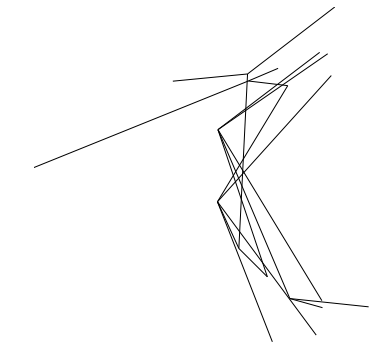

    After 20 iterations
        Discriminator Loss                         = -0.0971984118223

    Generator_Loss: -0.0413148403168
601
    After 20 iterations
        Discriminator Loss                         = -0.0868520215154

    Generator_Loss: -0.164242610335
602
    After 20 iterations
        Discriminator Loss                         = -0.0222051739693

    Generator_Loss: -0.128029614687
603
    After 20 iterations
        Discriminator Loss                         = -0.0338114351034

    Generator_Loss: -0.159425109625
604
    After 20 iterations
        Discriminator Loss                         = 0.00274223810993

    Generator_Loss: -0.128184348345
605
    After 20 iterations
        Discriminator Loss                         = -0.081993855536

    Generator_Loss: -0.0760197117925
606
    After 20 iterations
        Discriminator Loss                         = -0.0934499502182

    Generator_Loss: -0.0133497733623
607
    After 20 iterations
        Discriminator Loss   

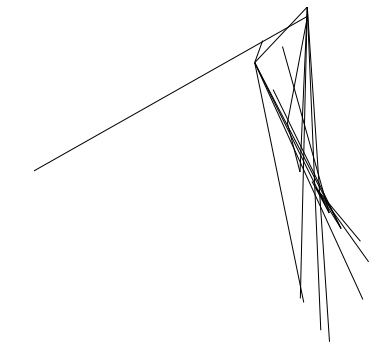

    After 20 iterations
        Discriminator Loss                         = 0.0199110712856

    Generator_Loss: -0.40564891696
626
    After 20 iterations
        Discriminator Loss                         = -0.0873304530978

    Generator_Loss: -0.420447617769
627
    After 20 iterations
        Discriminator Loss                         = 0.0829306766391

    Generator_Loss: -0.364758908749
628
    After 20 iterations
        Discriminator Loss                         = -0.0395681336522

    Generator_Loss: -0.347592741251
629
    After 20 iterations
        Discriminator Loss                         = -0.0640001446009

    Generator_Loss: -0.324176222086
630
    After 20 iterations
        Discriminator Loss                         = -0.0922194197774

    Generator_Loss: -0.278547883034
631
    After 20 iterations
        Discriminator Loss                         = -0.0929130464792

    Generator_Loss: -0.18824018538
632
    After 20 iterations
        Discriminator Loss         

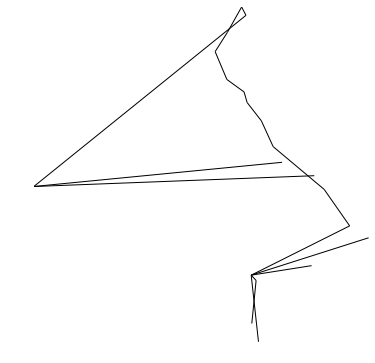

    After 20 iterations
        Discriminator Loss                         = -0.0235919710249

    Generator_Loss: 0.175268664956
651
    After 20 iterations
        Discriminator Loss                         = -0.0326730795205

    Generator_Loss: 0.141623824835
652
    After 20 iterations
        Discriminator Loss                         = 0.0126791354269

    Generator_Loss: 0.14479586482
653
    After 20 iterations
        Discriminator Loss                         = -0.0750813037157

    Generator_Loss: 0.131488859653
654
    After 20 iterations
        Discriminator Loss                         = -0.0473916269839

    Generator_Loss: 0.101065322757
655
    After 20 iterations
        Discriminator Loss                         = -0.128032192588

    Generator_Loss: 0.0611262992024
656
    After 20 iterations
        Discriminator Loss                         = -0.0426807142794

    Generator_Loss: 0.0195700284094
657
    After 20 iterations
        Discriminator Loss             

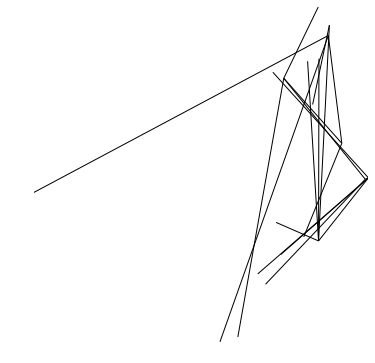

    After 20 iterations
        Discriminator Loss                         = -0.105683349073

    Generator_Loss: -0.295634955168
676
    After 20 iterations
        Discriminator Loss                         = -0.0621175169945

    Generator_Loss: -0.288410454988
677
    After 20 iterations
        Discriminator Loss                         = -0.122526757419

    Generator_Loss: -0.243538871408
678
    After 20 iterations
        Discriminator Loss                         = -0.0451208949089

    Generator_Loss: -0.177227407694
679
    After 20 iterations
        Discriminator Loss                         = -0.0465824529529

    Generator_Loss: -0.0899739637971
680
    After 20 iterations
        Discriminator Loss                         = -0.148098543286

    Generator_Loss: -0.0403477400541
681
    After 20 iterations
        Discriminator Loss                         = -0.119438476861

    Generator_Loss: -0.00186018459499
682
    After 20 iterations
        Discriminator Loss     

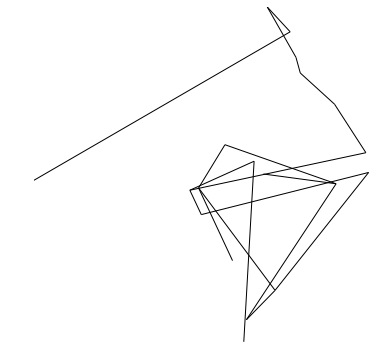

    After 20 iterations
        Discriminator Loss                         = -0.074415512383

    Generator_Loss: 0.133237749338
701
    After 20 iterations
        Discriminator Loss                         = -0.158784851432

    Generator_Loss: 0.0871914625168
702
    After 20 iterations
        Discriminator Loss                         = -0.079936735332

    Generator_Loss: 0.0445899292827
703
    After 20 iterations
        Discriminator Loss                         = -0.070675984025

    Generator_Loss: -0.00422552181408
704
    After 20 iterations
        Discriminator Loss                         = -0.193652689457

    Generator_Loss: 0.0050486610271
705
    After 20 iterations
        Discriminator Loss                         = -0.148457616568

    Generator_Loss: 0.0084117250517
706
    After 20 iterations
        Discriminator Loss                         = -0.119531959295

    Generator_Loss: -0.0524714328349
707
    After 20 iterations
        Discriminator Loss          

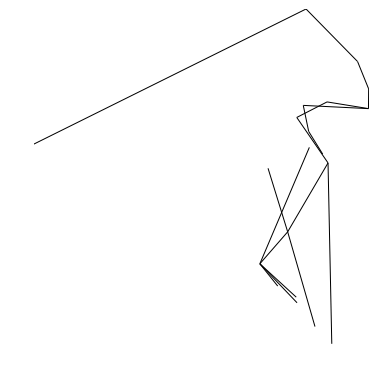

    After 20 iterations
        Discriminator Loss                         = -0.055670235306

    Generator_Loss: -0.252708256245
726
    After 20 iterations
        Discriminator Loss                         = -0.0591516084969

    Generator_Loss: -0.225567609072
727
    After 20 iterations
        Discriminator Loss                         = 0.0637492164969

    Generator_Loss: -0.163652420044
728
    After 20 iterations
        Discriminator Loss                         = -0.00877011101693

    Generator_Loss: -0.122122488916
729
    After 20 iterations
        Discriminator Loss                         = 0.0511073060334

    Generator_Loss: -0.0803493261337
730
    After 20 iterations
        Discriminator Loss                         = -0.0775606706738

    Generator_Loss: -0.0586063191295
731
    After 20 iterations
        Discriminator Loss                         = -0.00673157302663

    Generator_Loss: -0.0529690347612
732
    After 20 iterations
        Discriminator Loss   

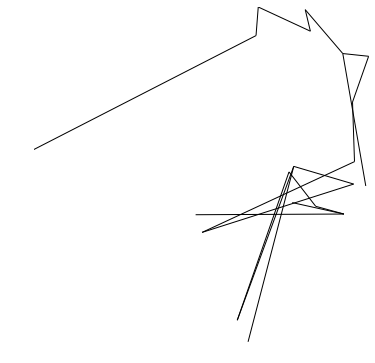

    After 20 iterations
        Discriminator Loss                         = -0.0544602684677

    Generator_Loss: -0.135405808687
751
    After 20 iterations
        Discriminator Loss                         = -0.0647985041142

    Generator_Loss: -0.162296578288
752
    After 20 iterations
        Discriminator Loss                         = -0.111055500805

    Generator_Loss: -0.143696948886
753
    After 20 iterations
        Discriminator Loss                         = -0.0830673277378

    Generator_Loss: -0.205847129226
754
    After 20 iterations
        Discriminator Loss                         = -0.0995705202222

    Generator_Loss: -0.145359963179
755
    After 20 iterations
        Discriminator Loss                         = 0.00777690019459

    Generator_Loss: -0.140709772706
756
    After 20 iterations
        Discriminator Loss                         = 0.0317307077348

    Generator_Loss: -0.159454628825
757
    After 20 iterations
        Discriminator Loss       

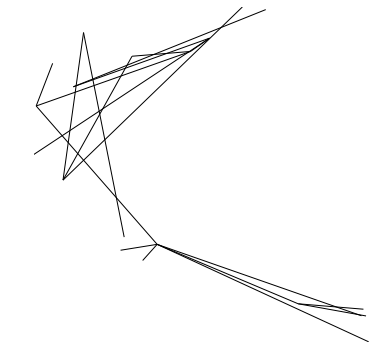

    After 20 iterations
        Discriminator Loss                         = -0.135474532843

    Generator_Loss: -0.256714165211
776
    After 20 iterations
        Discriminator Loss                         = -0.0838606953621

    Generator_Loss: -0.261275917292
777
    After 20 iterations
        Discriminator Loss                         = -0.152198433876

    Generator_Loss: -0.263096004725
778
    After 20 iterations
        Discriminator Loss                         = -0.0978369116783

    Generator_Loss: -0.306753486395
779
    After 20 iterations
        Discriminator Loss                         = -0.107459098101

    Generator_Loss: -0.257088184357
780
    After 20 iterations
        Discriminator Loss                         = -0.0242621134967

    Generator_Loss: -0.294708609581
781

    Epoch #1

    After 20 iterations
        Discriminator Loss                         = -0.0892967060208

    Generator_Loss: -0.268026649952
2
    After 20 iterations
        Discriminator

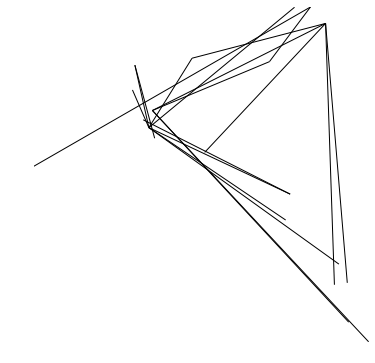

    After 20 iterations
        Discriminator Loss                         = -0.0445057861507

    Generator_Loss: 0.00027998603764
26
    After 20 iterations
        Discriminator Loss                         = -0.0878142639995

    Generator_Loss: -0.0317967198789
27
    After 20 iterations
        Discriminator Loss                         = -0.108283109963

    Generator_Loss: -0.075407795608
28
    After 20 iterations
        Discriminator Loss                         = -0.120066851377

    Generator_Loss: -0.107547461987
29
    After 20 iterations
        Discriminator Loss                         = -0.105439662933

    Generator_Loss: -0.191161513329
30
    After 20 iterations
        Discriminator Loss                         = -0.0549717471004

    Generator_Loss: -0.221564546227
31
    After 20 iterations
        Discriminator Loss                         = -0.104256473482

    Generator_Loss: -0.263612151146
32
    After 20 iterations
        Discriminator Loss              

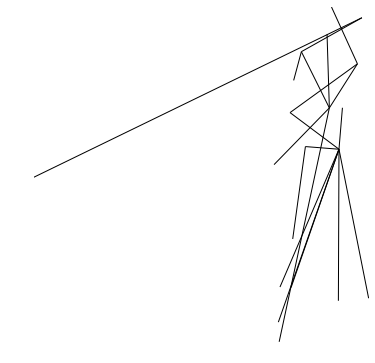

    After 20 iterations
        Discriminator Loss                         = -0.0847340524197

    Generator_Loss: -0.092629134655
51
    After 20 iterations
        Discriminator Loss                         = -0.114203423262

    Generator_Loss: -0.106018282473
52
    After 20 iterations
        Discriminator Loss                         = -0.0598740577698

    Generator_Loss: -0.0832396224141
53
    After 20 iterations
        Discriminator Loss                         = -0.0680031701922

    Generator_Loss: -0.054037950933
54
    After 20 iterations
        Discriminator Loss                         = -0.0452107414603

    Generator_Loss: -0.0214314647019
55
    After 20 iterations
        Discriminator Loss                         = -0.0492707453668

    Generator_Loss: -0.0145284226164
56
    After 20 iterations
        Discriminator Loss                         = -0.142417997122

    Generator_Loss: 0.036656614393
57
    After 20 iterations
        Discriminator Loss            

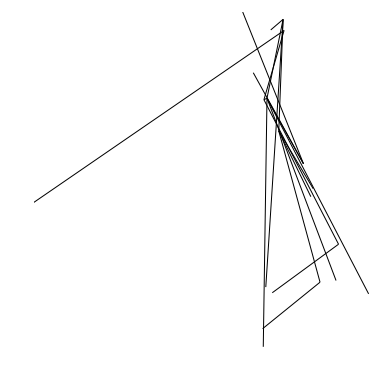

    After 20 iterations
        Discriminator Loss                         = -0.00592871848494

    Generator_Loss: -0.330805391073
76
    After 20 iterations
        Discriminator Loss                         = -0.00181576679461

    Generator_Loss: -0.317056596279
77
    After 20 iterations
        Discriminator Loss                         = -0.162247791886

    Generator_Loss: -0.326430976391
78
    After 20 iterations
        Discriminator Loss                         = 0.026449451223

    Generator_Loss: -0.349718928337
79
    After 20 iterations
        Discriminator Loss                         = -0.0421647876501

    Generator_Loss: -0.3629155159
80
    After 20 iterations
        Discriminator Loss                         = -0.035919636488

    Generator_Loss: -0.368437260389
81
    After 20 iterations
        Discriminator Loss                         = -0.0465718172491

    Generator_Loss: -0.329633891582
82
    After 20 iterations
        Discriminator Loss                

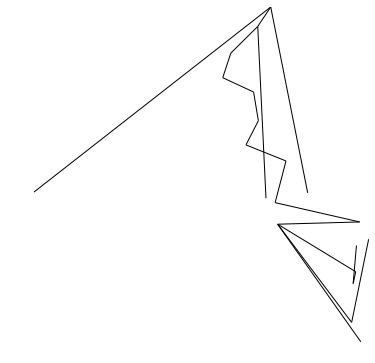

    After 20 iterations
        Discriminator Loss                         = 0.0411345511675

    Generator_Loss: -0.149558365345
101
    After 20 iterations
        Discriminator Loss                         = 0.0347200036049

    Generator_Loss: -0.164196163416
102
    After 20 iterations
        Discriminator Loss                         = -0.0197341069579

    Generator_Loss: -0.145794913173
103
    After 20 iterations
        Discriminator Loss                         = -0.0361303202808

    Generator_Loss: -0.115973837674
104
    After 20 iterations
        Discriminator Loss                         = 0.0272108446807

    Generator_Loss: -0.111268237233
105
    After 20 iterations
        Discriminator Loss                         = -0.105740994215

    Generator_Loss: -0.103357464075
106
    After 20 iterations
        Discriminator Loss                         = -0.0497660711408

    Generator_Loss: -0.0756023600698
107
    After 20 iterations
        Discriminator Loss        

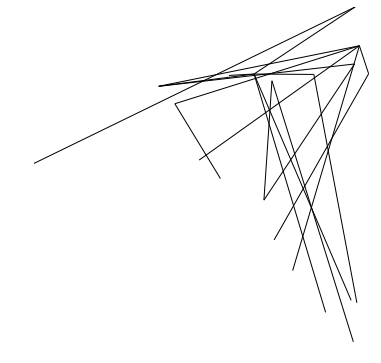

    After 20 iterations
        Discriminator Loss                         = -0.10390830785

    Generator_Loss: 0.0305177867413
126
    After 20 iterations
        Discriminator Loss                         = -0.0684859380126

    Generator_Loss: 0.0347648970783
127
    After 20 iterations
        Discriminator Loss                         = -0.0386617742479

    Generator_Loss: 0.0211332179606
128
    After 20 iterations
        Discriminator Loss                         = -0.0937286838889

    Generator_Loss: 0.0357923395932
129
    After 20 iterations
        Discriminator Loss                         = -0.154744341969

    Generator_Loss: 0.0786940902472
130
    After 20 iterations
        Discriminator Loss                         = -0.0878338143229

    Generator_Loss: 0.0514263771474
131
    After 20 iterations
        Discriminator Loss                         = -0.0202229246497

    Generator_Loss: 0.0435557328165
132
    After 20 iterations
        Discriminator Loss        

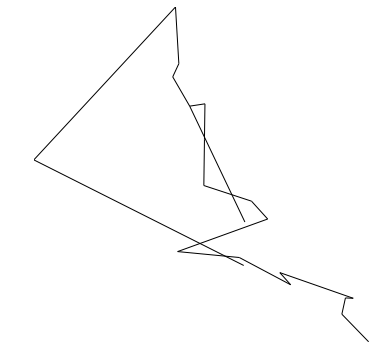

    After 20 iterations
        Discriminator Loss                         = -0.0443381667137

    Generator_Loss: 0.0293732099235
151
    After 20 iterations
        Discriminator Loss                         = -0.07786282897

    Generator_Loss: -0.00401375349611
152
    After 20 iterations
        Discriminator Loss                         = -0.123106583953

    Generator_Loss: -0.0944785550237
153
    After 20 iterations
        Discriminator Loss                         = -0.0653323754668

    Generator_Loss: -0.0922246128321
154
    After 20 iterations
        Discriminator Loss                         = -0.0542734414339

    Generator_Loss: -0.148550242186
155
    After 20 iterations
        Discriminator Loss                         = -0.0528611131012

    Generator_Loss: -0.159800425172
156
    After 20 iterations
        Discriminator Loss                         = -0.043656565249

    Generator_Loss: -0.183734834194
157
    After 20 iterations
        Discriminator Loss     

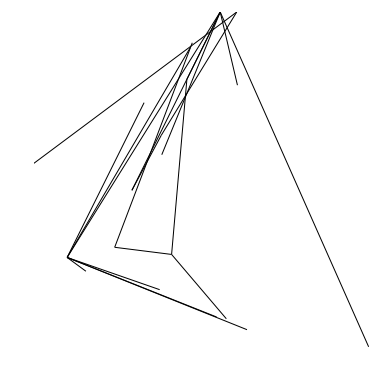

    After 20 iterations
        Discriminator Loss                         = 0.0575993284583

    Generator_Loss: -0.0481231957674
176
    After 20 iterations
        Discriminator Loss                         = -0.140227913857

    Generator_Loss: -0.0901989340782
177
    After 20 iterations
        Discriminator Loss                         = 0.014637296088

    Generator_Loss: -0.0817491784692
178
    After 20 iterations
        Discriminator Loss                         = -0.0572703815997

    Generator_Loss: -0.0311472509056
179
    After 20 iterations
        Discriminator Loss                         = -0.079679325223

    Generator_Loss: -0.0319644659758
180
    After 20 iterations
        Discriminator Loss                         = -0.0160206910223

    Generator_Loss: -0.02600402385
181
    After 20 iterations
        Discriminator Loss                         = 0.015720916912

    Generator_Loss: -0.023284746334
182
    After 20 iterations
        Discriminator Loss        

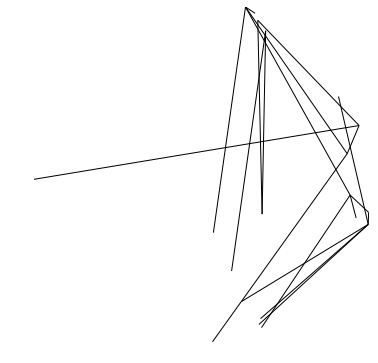

    After 20 iterations
        Discriminator Loss                         = -0.00834493711591

    Generator_Loss: 0.255754202604
201
    After 20 iterations
        Discriminator Loss                         = -0.108436256647

    Generator_Loss: 0.284175843
202
    After 20 iterations
        Discriminator Loss                         = -0.112777672708

    Generator_Loss: 0.281557708979
203
    After 20 iterations
        Discriminator Loss                         = -0.0798781812191

    Generator_Loss: 0.291519761086
204
    After 20 iterations
        Discriminator Loss                         = -0.0676137804985

    Generator_Loss: 0.288390278816
205
    After 20 iterations
        Discriminator Loss                         = -0.0887643620372

    Generator_Loss: 0.250233918428
206
    After 20 iterations
        Discriminator Loss                         = -0.020196672529

    Generator_Loss: 0.206761986017
207
    After 20 iterations
        Discriminator Loss                 

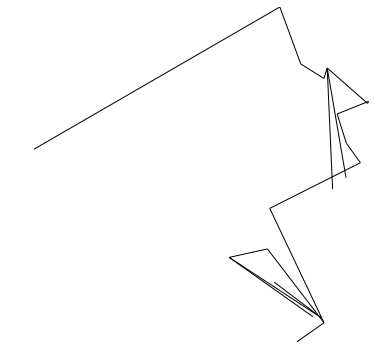

    After 20 iterations
        Discriminator Loss                         = 0.0186200886965

    Generator_Loss: -0.0198987424374
226
    After 20 iterations
        Discriminator Loss                         = -0.106317259371

    Generator_Loss: -0.0109482230619
227
    After 20 iterations
        Discriminator Loss                         = -0.0341920778155

    Generator_Loss: 0.0149977719411
228
    After 20 iterations
        Discriminator Loss                         = -0.0218064710498

    Generator_Loss: 0.0341644287109
229
    After 20 iterations
        Discriminator Loss                         = -0.0802246779203

    Generator_Loss: 0.0339634008706
230
    After 20 iterations
        Discriminator Loss                         = -0.0665313079953

    Generator_Loss: 0.0443242117763
231
    After 20 iterations
        Discriminator Loss                         = -0.0194838475436

    Generator_Loss: 0.0258609950542
232
    After 20 iterations
        Discriminator Loss     

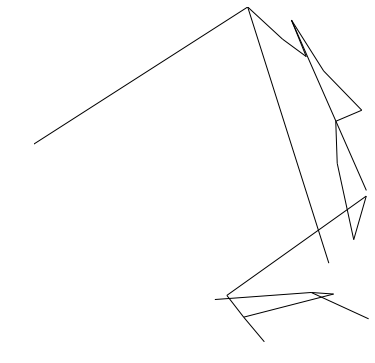

    After 20 iterations
        Discriminator Loss                         = -0.00372533756308

    Generator_Loss: -0.101044252515
251
    After 20 iterations
        Discriminator Loss                         = 0.0115718906745

    Generator_Loss: -0.103595159948
252
    After 20 iterations
        Discriminator Loss                         = -0.0542070269585

    Generator_Loss: -0.16859485209
253
    After 20 iterations
        Discriminator Loss                         = -0.0290707517415

    Generator_Loss: -0.179688364267
254
    After 20 iterations
        Discriminator Loss                         = -0.133825212717

    Generator_Loss: -0.20080935955
255
    After 20 iterations
        Discriminator Loss                         = -0.0139412051067

    Generator_Loss: -0.212712615728
256
    After 20 iterations
        Discriminator Loss                         = -0.12571336329

    Generator_Loss: -0.201415032148
257
    After 20 iterations
        Discriminator Loss          

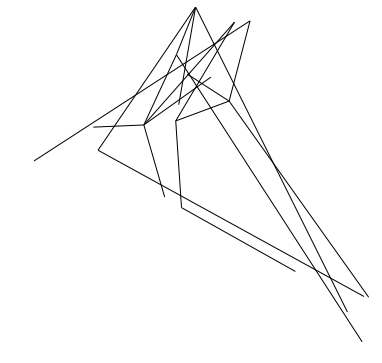

    After 20 iterations
        Discriminator Loss                         = 0.0172808598727

    Generator_Loss: -0.329516679049
276
    After 20 iterations
        Discriminator Loss                         = -0.0250919181854

    Generator_Loss: -0.310288220644
277
    After 20 iterations
        Discriminator Loss                         = -0.0540504716337

    Generator_Loss: -0.244063019753
278
    After 20 iterations
        Discriminator Loss                         = -0.00607026088983

    Generator_Loss: -0.273700237274
279
    After 20 iterations
        Discriminator Loss                         = -0.0614760778844

    Generator_Loss: -0.233421683311
280
    After 20 iterations
        Discriminator Loss                         = -0.0842209085822

    Generator_Loss: -0.190903902054
281
    After 20 iterations
        Discriminator Loss                         = -0.000417909177486

    Generator_Loss: -0.199573725462
282
    After 20 iterations
        Discriminator Loss   

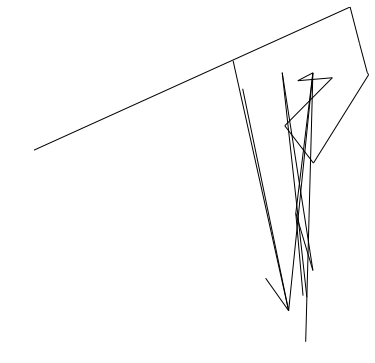

    After 20 iterations
        Discriminator Loss                         = -0.00766166392714

    Generator_Loss: 0.21092645824
301
    After 20 iterations
        Discriminator Loss                         = -0.0616667978466

    Generator_Loss: 0.280242651701
302
    After 20 iterations
        Discriminator Loss                         = -0.0674370750785

    Generator_Loss: 0.283584266901
303
    After 20 iterations
        Discriminator Loss                         = -0.0687081366777

    Generator_Loss: 0.282416284084
304
    After 20 iterations
        Discriminator Loss                         = -0.0234439559281

    Generator_Loss: 0.30484649539
305
    After 20 iterations
        Discriminator Loss                         = -0.113511569798

    Generator_Loss: 0.32634422183
306
    After 20 iterations
        Discriminator Loss                         = -0.0605483427644

    Generator_Loss: 0.31627753377
307
    After 20 iterations
        Discriminator Loss                

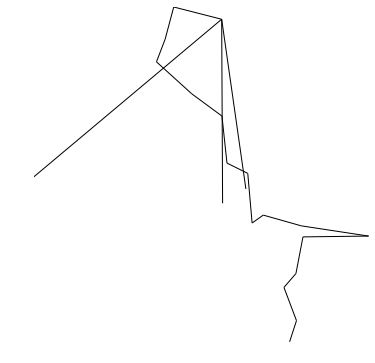

    After 20 iterations
        Discriminator Loss                         = -0.0130488583818

    Generator_Loss: -0.345243036747
326
    After 20 iterations
        Discriminator Loss                         = 0.00669419765472

    Generator_Loss: -0.30749475956
327
    After 20 iterations
        Discriminator Loss                         = 0.00567994685844

    Generator_Loss: -0.299193769693
328
    After 20 iterations
        Discriminator Loss                         = -0.0576951615512

    Generator_Loss: -0.297795444727
329
    After 20 iterations
        Discriminator Loss                         = -0.0315209776163

    Generator_Loss: -0.264368802309
330
    After 20 iterations
        Discriminator Loss                         = -0.0658364892006

    Generator_Loss: -0.251382052898
331
    After 20 iterations
        Discriminator Loss                         = -0.13411475718

    Generator_Loss: -0.180303186178
332
    After 20 iterations
        Discriminator Loss        

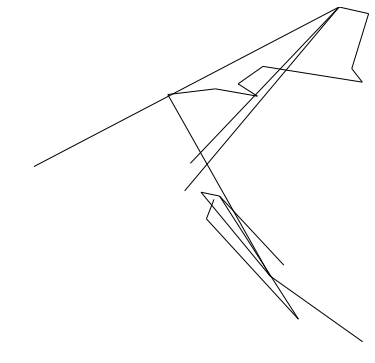

    After 20 iterations
        Discriminator Loss                         = -0.0598395913839

    Generator_Loss: -0.0706729218364
351
    After 20 iterations
        Discriminator Loss                         = 0.0166852101684

    Generator_Loss: -0.0928785055876
352
    After 20 iterations
        Discriminator Loss                         = -0.0475071556866

    Generator_Loss: 0.0400169081986
353
    After 20 iterations
        Discriminator Loss                         = 0.0230875313282

    Generator_Loss: 0.0444763675332
354
    After 20 iterations
        Discriminator Loss                         = 0.0182387772948

    Generator_Loss: 0.171064317226
355
    After 20 iterations
        Discriminator Loss                         = 0.0875497236848

    Generator_Loss: 0.155069857836
356
    After 20 iterations
        Discriminator Loss                         = -0.0445024631917

    Generator_Loss: 0.142432972789
357
    After 20 iterations
        Discriminator Loss          

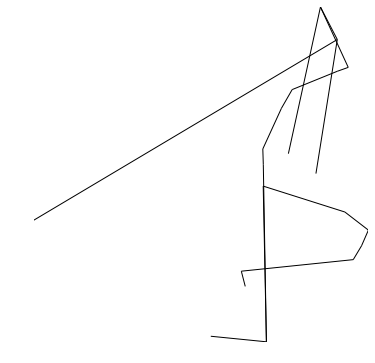

    After 20 iterations
        Discriminator Loss                         = -0.0405491366982

    Generator_Loss: -0.300024807453
376
    After 20 iterations
        Discriminator Loss                         = -0.0229438506067

    Generator_Loss: -0.294879376888
377
    After 20 iterations
        Discriminator Loss                         = -0.0702768489718

    Generator_Loss: -0.32842746377
378
    After 20 iterations
        Discriminator Loss                         = -0.0762311592698

    Generator_Loss: -0.283489048481
379
    After 20 iterations
        Discriminator Loss                         = -0.015428069979

    Generator_Loss: -0.290046840906
380
    After 20 iterations
        Discriminator Loss                         = -0.0521102100611

    Generator_Loss: -0.282449990511
381
    After 20 iterations
        Discriminator Loss                         = -0.0577921159565

    Generator_Loss: -0.309012711048
382
    After 20 iterations
        Discriminator Loss       

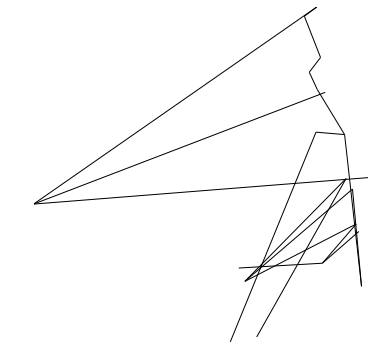

    After 20 iterations
        Discriminator Loss                         = -0.0865067839622

    Generator_Loss: -0.0619762316346
401
    After 20 iterations
        Discriminator Loss                         = -0.0715123340487

    Generator_Loss: -0.0675045475364
402
    After 20 iterations
        Discriminator Loss                         = -0.119491055608

    Generator_Loss: -0.0999617576599
403
    After 20 iterations
        Discriminator Loss                         = 0.00107763172127

    Generator_Loss: -0.107761651278
404
    After 20 iterations
        Discriminator Loss                         = -0.0713475197554

    Generator_Loss: -0.0815222784877
405
    After 20 iterations
        Discriminator Loss                         = -0.0498472191393

    Generator_Loss: -0.0357196889818
406
    After 20 iterations
        Discriminator Loss                         = -0.122880399227

    Generator_Loss: -0.036035079509
407
    After 20 iterations
        Discriminator Loss  

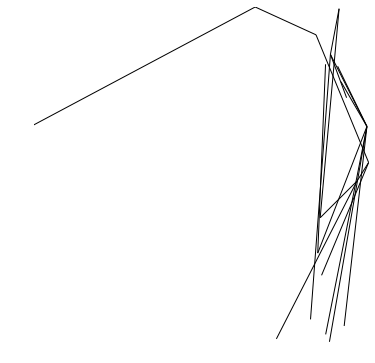

    After 20 iterations
        Discriminator Loss                         = -0.0262007694691

    Generator_Loss: 0.0333741717041
426
    After 20 iterations
        Discriminator Loss                         = -0.0999924764037

    Generator_Loss: 0.0706716701388
427
    After 20 iterations
        Discriminator Loss                         = -0.113749362528

    Generator_Loss: 0.0778292492032
428
    After 20 iterations
        Discriminator Loss                         = -0.0954574421048

    Generator_Loss: 0.0427694097161
429
    After 20 iterations
        Discriminator Loss                         = -0.0736157745123

    Generator_Loss: 0.0160432495177
430
    After 20 iterations
        Discriminator Loss                         = -0.0318306386471

    Generator_Loss: -0.0714575201273
431
    After 20 iterations
        Discriminator Loss                         = -0.0484362877905

    Generator_Loss: -0.151028290391
432
    After 20 iterations
        Discriminator Loss     

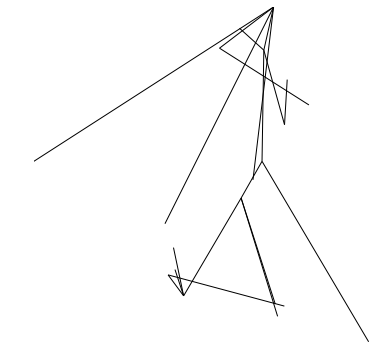

    After 20 iterations
        Discriminator Loss                         = -0.0528369061649

    Generator_Loss: -0.438386708498
451
    After 20 iterations
        Discriminator Loss                         = -0.0595069080591

    Generator_Loss: -0.502563476562
452
    After 20 iterations
        Discriminator Loss                         = -0.0591992661357

    Generator_Loss: -0.565762221813
453
    After 20 iterations
        Discriminator Loss                         = -0.0502831414342

    Generator_Loss: -0.617559432983
454
    After 20 iterations
        Discriminator Loss                         = -0.0547820292413

    Generator_Loss: -0.648011088371
455
    After 20 iterations
        Discriminator Loss                         = -0.120593354106

    Generator_Loss: -0.692441940308
456
    After 20 iterations
        Discriminator Loss                         = -0.00757629889995

    Generator_Loss: -0.62108528614
457
    After 20 iterations
        Discriminator Loss      

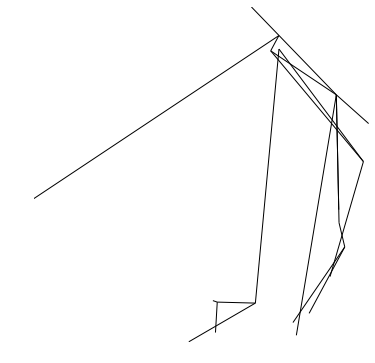

    After 20 iterations
        Discriminator Loss                         = -0.00471930857748

    Generator_Loss: 0.0284887589514
476
    After 20 iterations
        Discriminator Loss                         = -0.000464591110358

    Generator_Loss: 0.0754337012768
477
    After 20 iterations
        Discriminator Loss                         = 0.0128340125084

    Generator_Loss: 0.146009981632
478
    After 20 iterations
        Discriminator Loss                         = -0.0326024442911

    Generator_Loss: 0.162462830544
479
    After 20 iterations
        Discriminator Loss                         = -0.0947309881449

    Generator_Loss: 0.169564276934
480
    After 20 iterations
        Discriminator Loss                         = 0.0229541119188

    Generator_Loss: 0.196995452046
481
    After 20 iterations
        Discriminator Loss                         = -0.00430594431236

    Generator_Loss: 0.191337093711
482
    After 20 iterations
        Discriminator Loss        

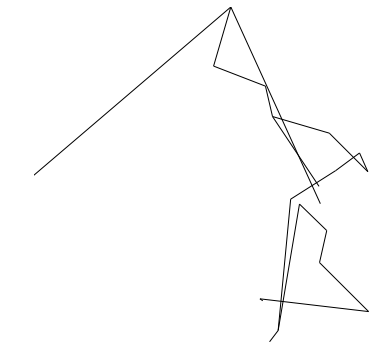

    After 20 iterations
        Discriminator Loss                         = -0.00275364005938

    Generator_Loss: -0.273225486279
501
    After 20 iterations
        Discriminator Loss                         = 0.0426919199526

    Generator_Loss: -0.256390482187
502
    After 20 iterations
        Discriminator Loss                         = -0.0252426955849

    Generator_Loss: -0.267122238874
503
    After 20 iterations
        Discriminator Loss                         = -0.0610639713705

    Generator_Loss: -0.267684847116
504
    After 20 iterations
        Discriminator Loss                         = -0.057813923806

    Generator_Loss: -0.295726150274
505
    After 20 iterations
        Discriminator Loss                         = -0.033151499927

    Generator_Loss: -0.236864760518
506
    After 20 iterations
        Discriminator Loss                         = -0.0233897212893

    Generator_Loss: -0.230378329754
507
    After 20 iterations
        Discriminator Loss       

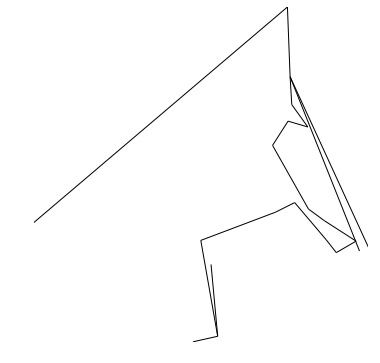

    After 20 iterations
        Discriminator Loss                         = -0.0388854444027

    Generator_Loss: -0.21987272799
526
    After 20 iterations
        Discriminator Loss                         = 0.0290725994855

    Generator_Loss: -0.199061512947
527
    After 20 iterations
        Discriminator Loss                         = -0.110396124423

    Generator_Loss: -0.165205135942
528
    After 20 iterations
        Discriminator Loss                         = 0.0215894784778

    Generator_Loss: -0.092865742743
529
    After 20 iterations
        Discriminator Loss                         = -0.058073155582

    Generator_Loss: -0.0455954484642
530
    After 20 iterations
        Discriminator Loss                         = -0.0913761928678

    Generator_Loss: 0.00123428949155
531
    After 20 iterations
        Discriminator Loss                         = 0.00507250940427

    Generator_Loss: 0.00815816223621
532
    After 20 iterations
        Discriminator Loss       

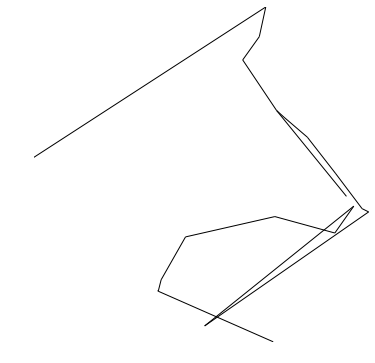

    After 20 iterations
        Discriminator Loss                         = -0.0815025866032

    Generator_Loss: 0.206013634801
551
    After 20 iterations
        Discriminator Loss                         = -0.109594382346

    Generator_Loss: 0.217279240489
552
    After 20 iterations
        Discriminator Loss                         = 0.0160433724523

    Generator_Loss: 0.135088205338
553
    After 20 iterations
        Discriminator Loss                         = 0.0023715721909

    Generator_Loss: 0.0394979938865
554
    After 20 iterations
        Discriminator Loss                         = -0.0863712951541

    Generator_Loss: -0.0248584058136
555
    After 20 iterations
        Discriminator Loss                         = -0.0273895263672

    Generator_Loss: -0.070292532444
556
    After 20 iterations
        Discriminator Loss                         = -0.0740098655224

    Generator_Loss: -0.142934992909
557
    After 20 iterations
        Discriminator Loss          

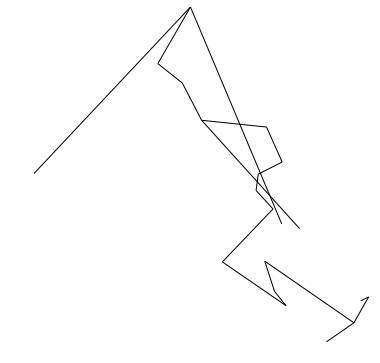

    After 20 iterations
        Discriminator Loss                         = -0.0212967600673

    Generator_Loss: 0.399412453175
576
    After 20 iterations
        Discriminator Loss                         = -0.0978718400002

    Generator_Loss: 0.371660917997
577
    After 20 iterations
        Discriminator Loss                         = -0.0429238714278

    Generator_Loss: 0.319570451975
578
    After 20 iterations
        Discriminator Loss                         = -0.0648009032011

    Generator_Loss: 0.234779894352
579
    After 20 iterations
        Discriminator Loss                         = -0.0645241215825

    Generator_Loss: 0.154244631529
580
    After 20 iterations
        Discriminator Loss                         = 0.0471725128591

    Generator_Loss: 0.0723780840635
581
    After 20 iterations
        Discriminator Loss                         = 0.0116344923154

    Generator_Loss: 0.0170192606747
582
    After 20 iterations
        Discriminator Loss            

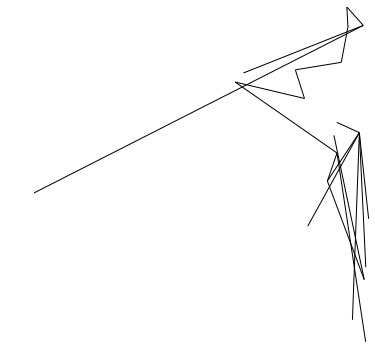

    After 20 iterations
        Discriminator Loss                         = -0.0818484202027

    Generator_Loss: -0.0208136159927
601
    After 20 iterations
        Discriminator Loss                         = -0.101146124303

    Generator_Loss: -0.0656104311347
602
    After 20 iterations
        Discriminator Loss                         = -0.0397853031754

    Generator_Loss: -0.105857349932
603
    After 20 iterations
        Discriminator Loss                         = -0.0226922426373

    Generator_Loss: -0.144709527493
604
    After 20 iterations
        Discriminator Loss                         = -0.0190756134689

    Generator_Loss: -0.160808935761
605
    After 20 iterations
        Discriminator Loss                         = -0.0815589502454

    Generator_Loss: -0.186859697104
606
    After 20 iterations
        Discriminator Loss                         = -0.130007043481

    Generator_Loss: -0.163495108485
607
    After 20 iterations
        Discriminator Loss     

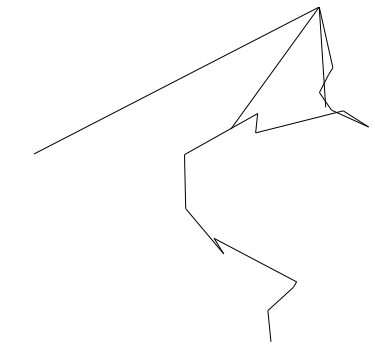

    After 20 iterations
        Discriminator Loss                         = -0.0385445207357

    Generator_Loss: -0.0683672651649
626
    After 20 iterations
        Discriminator Loss                         = -0.0608256272972

    Generator_Loss: -0.15018633008
627
    After 20 iterations
        Discriminator Loss                         = -0.0204255227

    Generator_Loss: -0.192213773727
628
    After 20 iterations
        Discriminator Loss                         = -0.00916568655521

    Generator_Loss: -0.168977737427
629
    After 20 iterations
        Discriminator Loss                         = -0.0476466268301

    Generator_Loss: -0.192299127579
630
    After 20 iterations
        Discriminator Loss                         = -0.0380505248904

    Generator_Loss: -0.154555588961
631
    After 20 iterations
        Discriminator Loss                         = -0.0460726171732

    Generator_Loss: -0.113366149366
632
    After 20 iterations
        Discriminator Loss       

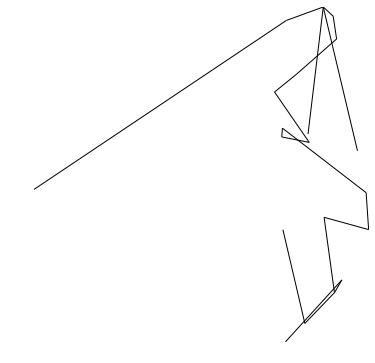

    After 20 iterations
        Discriminator Loss                         = -0.0138292405754

    Generator_Loss: -0.278403192759
651
    After 20 iterations
        Discriminator Loss                         = -0.0462359860539

    Generator_Loss: -0.331276625395
652
    After 20 iterations
        Discriminator Loss                         = 0.0712323859334

    Generator_Loss: -0.268718034029
653
    After 20 iterations
        Discriminator Loss                         = -0.0359060540795

    Generator_Loss: -0.25245603919
654
    After 20 iterations
        Discriminator Loss                         = 0.0148675516248

    Generator_Loss: -0.188290908933
655
    After 20 iterations
        Discriminator Loss                         = -0.0743966847658

    Generator_Loss: -0.193480029702
656
    After 20 iterations
        Discriminator Loss                         = -0.0137888239697

    Generator_Loss: -0.180212780833
657
    After 20 iterations
        Discriminator Loss        

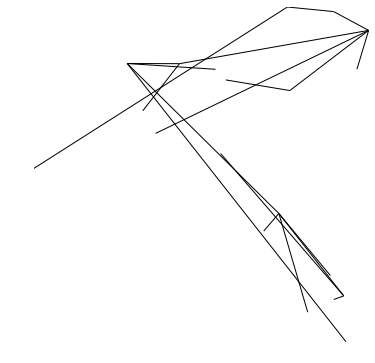

    After 20 iterations
        Discriminator Loss                         = -0.13944734633

    Generator_Loss: -0.174082249403
676
    After 20 iterations
        Discriminator Loss                         = -0.0262550003827

    Generator_Loss: -0.18364854157
677
    After 20 iterations
        Discriminator Loss                         = -0.0657346397638

    Generator_Loss: -0.143106728792
678
    After 20 iterations
        Discriminator Loss                         = 0.0234924163669

    Generator_Loss: -0.154140770435
679
    After 20 iterations
        Discriminator Loss                         = 0.003516291501

    Generator_Loss: -0.127491921186
680
    After 20 iterations
        Discriminator Loss                         = -0.12794855237

    Generator_Loss: -0.0914910957217
681
    After 20 iterations
        Discriminator Loss                         = 0.0156310517341

    Generator_Loss: -0.0781279876828
682
    After 20 iterations
        Discriminator Loss            

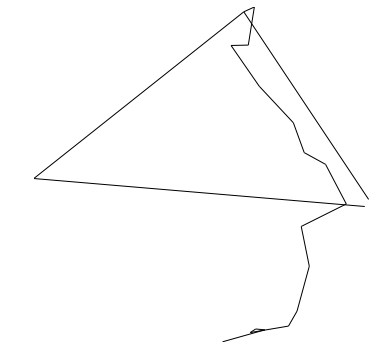

    After 20 iterations
        Discriminator Loss                         = -0.0475253909826

    Generator_Loss: -0.279242753983
701
    After 20 iterations
        Discriminator Loss                         = -0.0844930484891

    Generator_Loss: -0.317271709442
702
    After 20 iterations
        Discriminator Loss                         = -0.0232243463397

    Generator_Loss: -0.351363569498
703
    After 20 iterations
        Discriminator Loss                         = -0.0123464213684

    Generator_Loss: -0.37612220645
704
    After 20 iterations
        Discriminator Loss                         = -0.15313307941

    Generator_Loss: -0.389220416546
705
    After 20 iterations
        Discriminator Loss                         = -0.120438054204

    Generator_Loss: -0.317716866732
706
    After 20 iterations
        Discriminator Loss                         = -0.0804991945624

    Generator_Loss: -0.265646100044
707
    After 20 iterations
        Discriminator Loss         

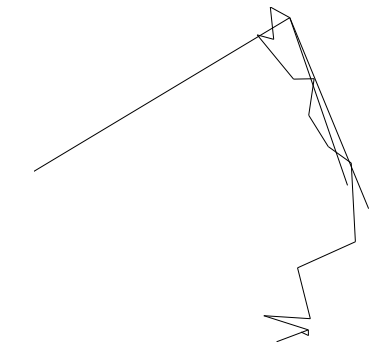

    After 20 iterations
        Discriminator Loss                         = -0.0310787875205

    Generator_Loss: -0.391973316669
726
    After 20 iterations
        Discriminator Loss                         = -0.0576688349247

    Generator_Loss: -0.374588429928
727
    After 20 iterations
        Discriminator Loss                         = 0.0755571722984

    Generator_Loss: -0.345963865519
728
    After 20 iterations
        Discriminator Loss                         = -0.0655449032784

    Generator_Loss: -0.315932273865
729
    After 20 iterations
        Discriminator Loss                         = -0.00649962294847

    Generator_Loss: -0.228978946805
730
    After 20 iterations
        Discriminator Loss                         = -0.0514967516065

    Generator_Loss: -0.167554631829
731
    After 20 iterations
        Discriminator Loss                         = 0.00110973021947

    Generator_Loss: -0.0870386213064
732
    After 20 iterations
        Discriminator Loss    

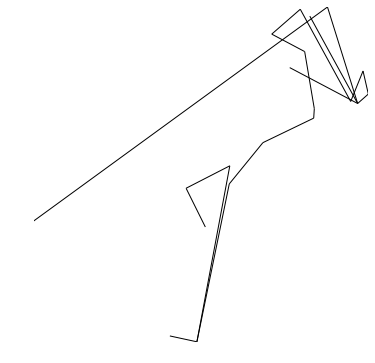

    After 20 iterations
        Discriminator Loss                         = 0.0449491031468

    Generator_Loss: -0.157810717821
751
    After 20 iterations
        Discriminator Loss                         = 0.00244371686131

    Generator_Loss: -0.179304078221
752
    After 20 iterations
        Discriminator Loss                         = -0.0508753433824

    Generator_Loss: -0.135887399316
753
    After 20 iterations
        Discriminator Loss                         = -0.0702436119318

    Generator_Loss: -0.0415980406106
754
    After 20 iterations
        Discriminator Loss                         = -0.0778719484806

    Generator_Loss: -0.00615570321679
755
    After 20 iterations
        Discriminator Loss                         = -0.0546581298113

    Generator_Loss: 0.00609835796058
756
    After 20 iterations
        Discriminator Loss                         = -0.0909720212221

    Generator_Loss: 0.0520805642009
757
    After 20 iterations
        Discriminator Loss  

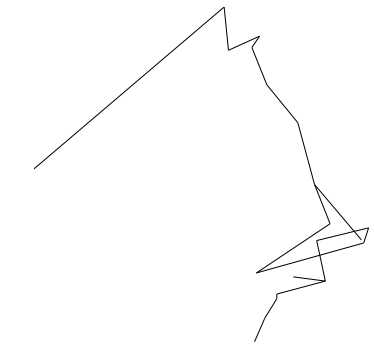

    After 20 iterations
        Discriminator Loss                         = -0.0502464175224

    Generator_Loss: -0.300837278366
776
    After 20 iterations
        Discriminator Loss                         = -0.00451432773843

    Generator_Loss: -0.256744772196
777
    After 20 iterations
        Discriminator Loss                         = -0.0333796031773

    Generator_Loss: -0.175183042884
778
    After 20 iterations
        Discriminator Loss                         = -0.0201031919569

    Generator_Loss: -0.171187222004
779
    After 20 iterations
        Discriminator Loss                         = -0.042087726295

    Generator_Loss: -0.0520656220615
780
    After 20 iterations
        Discriminator Loss                         = 0.0150930574164

    Generator_Loss: -0.00288269552402
781

    Epoch #2

    After 20 iterations
        Discriminator Loss                         = -0.0979515835643

    Generator_Loss: 0.0724835991859
2
    After 20 iterations
        Discrimi

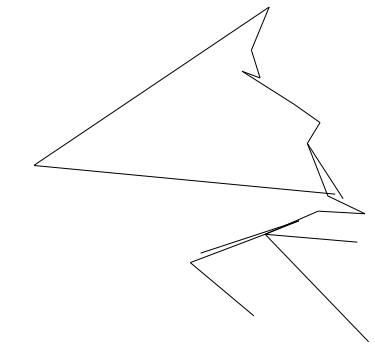

    After 20 iterations
        Discriminator Loss                         = -0.0497179552913

    Generator_Loss: -0.071634978056
26
    After 20 iterations
        Discriminator Loss                         = -0.0375928133726

    Generator_Loss: -0.1002940014
27
    After 20 iterations
        Discriminator Loss                         = -0.0340789780021

    Generator_Loss: -0.142770677805
28
    After 20 iterations
        Discriminator Loss                         = -0.0417524427176

    Generator_Loss: -0.191937476397
29
    After 20 iterations
        Discriminator Loss                         = -0.0395474210382

    Generator_Loss: -0.211760744452
30
    After 20 iterations
        Discriminator Loss                         = 0.0215439982712

    Generator_Loss: -0.226783543825
31
    After 20 iterations
        Discriminator Loss                         = -0.0191243328154

    Generator_Loss: -0.24633026123
32
    After 20 iterations
        Discriminator Loss                

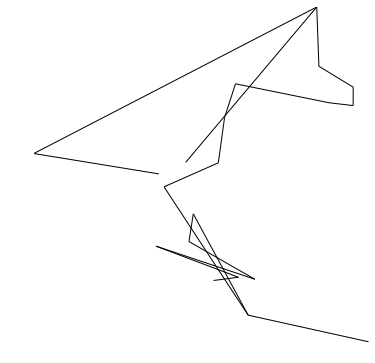

    After 20 iterations
        Discriminator Loss                         = -0.0438746288419

    Generator_Loss: -0.163431823254
51
    After 20 iterations
        Discriminator Loss                         = -0.103723980486

    Generator_Loss: -0.200075462461
52
    After 20 iterations
        Discriminator Loss                         = -0.0861646607518

    Generator_Loss: -0.276241183281
53
    After 20 iterations
        Discriminator Loss                         = -0.090199790895

    Generator_Loss: -0.310514986515
54
    After 20 iterations
        Discriminator Loss                         = -0.036589499563

    Generator_Loss: -0.355414479971
55
    After 20 iterations
        Discriminator Loss                         = -0.0466454327106

    Generator_Loss: -0.437282711267
56
    After 20 iterations
        Discriminator Loss                         = -0.115190856159

    Generator_Loss: -0.420435547829
57
    After 20 iterations
        Discriminator Loss                

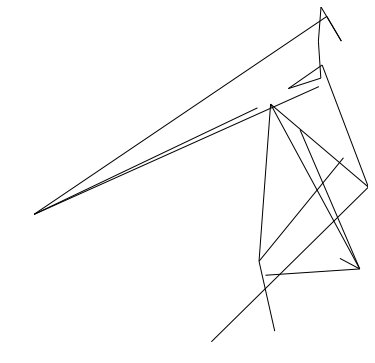

    After 20 iterations
        Discriminator Loss                         = -0.0336078070104

    Generator_Loss: -0.100180067122
76
    After 20 iterations
        Discriminator Loss                         = 0.0218838434666

    Generator_Loss: -0.0951335281134
77
    After 20 iterations
        Discriminator Loss                         = -0.110498659313

    Generator_Loss: -0.0818759202957
78
    After 20 iterations
        Discriminator Loss                         = 0.0361860729754

    Generator_Loss: -0.106860876083
79
    After 20 iterations
        Discriminator Loss                         = -0.0141223426908

    Generator_Loss: -0.108005277812
80
    After 20 iterations
        Discriminator Loss                         = -0.05140145123

    Generator_Loss: -0.0466364510357
81
    After 20 iterations
        Discriminator Loss                         = -0.06863129884

    Generator_Loss: 0.0187221691012
82
    After 20 iterations
        Discriminator Loss                

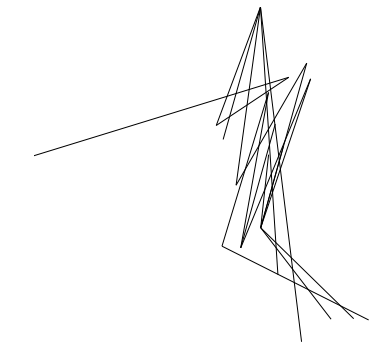

    After 20 iterations
        Discriminator Loss                         = 0.017278296873

    Generator_Loss: 0.107910558581
101
    After 20 iterations
        Discriminator Loss                         = -0.00887908320874

    Generator_Loss: 0.141535490751
102
    After 20 iterations
        Discriminator Loss                         = 0.0243113506585

    Generator_Loss: 0.153155848384
103
    After 20 iterations
        Discriminator Loss                         = -0.0530945956707

    Generator_Loss: 0.176502510905
104
    After 20 iterations
        Discriminator Loss                         = 0.0124860201031

    Generator_Loss: 0.139945313334
105
    After 20 iterations
        Discriminator Loss                         = -0.0659458562732

    Generator_Loss: 0.170512825251
106
    After 20 iterations
        Discriminator Loss                         = -0.0082053495571

    Generator_Loss: 0.15775154531
107
    After 20 iterations
        Discriminator Loss                

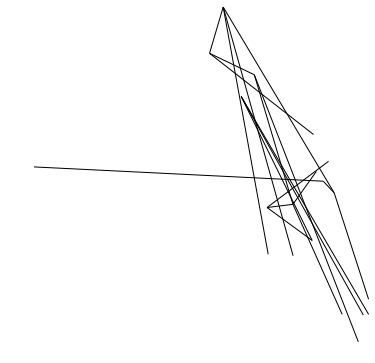

    After 20 iterations
        Discriminator Loss                         = 0.0168510749936

    Generator_Loss: 0.0505684539676
126
    After 20 iterations
        Discriminator Loss                         = -0.0156994555146

    Generator_Loss: 0.0225632861257
127
    After 20 iterations
        Discriminator Loss                         = 0.00767846824601

    Generator_Loss: -0.0494287349284
128
    After 20 iterations
        Discriminator Loss                         = -0.0298606976867

    Generator_Loss: -0.0701305493712
129
    After 20 iterations
        Discriminator Loss                         = -0.103296637535

    Generator_Loss: -0.0943525359035
130
    After 20 iterations
        Discriminator Loss                         = -0.0462146773934

    Generator_Loss: -0.117132455111
131
    After 20 iterations
        Discriminator Loss                         = 0.00654660351574

    Generator_Loss: -0.152000486851
132
    After 20 iterations
        Discriminator Loss    

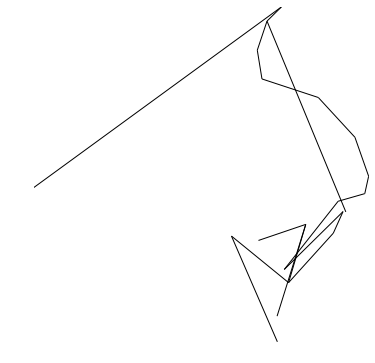

    After 20 iterations
        Discriminator Loss                         = -0.0418724380434

    Generator_Loss: 0.0434722416103
151
    After 20 iterations
        Discriminator Loss                         = -0.0169217903167

    Generator_Loss: 0.105672940612
152
    After 20 iterations
        Discriminator Loss                         = -0.109347581863

    Generator_Loss: 0.111100398004
153
    After 20 iterations
        Discriminator Loss                         = -0.0608747564256

    Generator_Loss: 0.171024993062
154
    After 20 iterations
        Discriminator Loss                         = -0.0832861736417

    Generator_Loss: 0.192771613598
155
    After 20 iterations
        Discriminator Loss                         = -0.05616492033

    Generator_Loss: 0.220790952444
156
    After 20 iterations
        Discriminator Loss                         = -0.0171836894006

    Generator_Loss: 0.240059748292
157
    After 20 iterations
        Discriminator Loss              

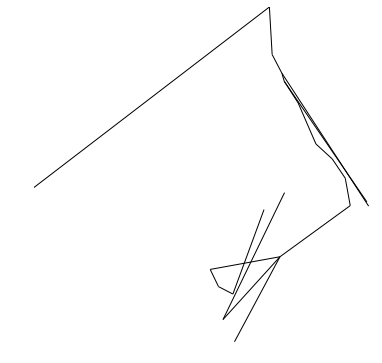

    After 20 iterations
        Discriminator Loss                         = -0.00901462882757

    Generator_Loss: 0.345092862844
176
    After 20 iterations
        Discriminator Loss                         = -0.104524806142

    Generator_Loss: 0.296475917101
177
    After 20 iterations
        Discriminator Loss                         = 0.0158227793872

    Generator_Loss: 0.335301935673
178
    After 20 iterations
        Discriminator Loss                         = 0.00295037752949

    Generator_Loss: 0.312215596437
179
    After 20 iterations
        Discriminator Loss                         = 0.00419382331893

    Generator_Loss: 0.306692630053
180
    After 20 iterations
        Discriminator Loss                         = -0.03926846385

    Generator_Loss: 0.323535859585
181
    After 20 iterations
        Discriminator Loss                         = 0.0163929127157

    Generator_Loss: 0.309749484062
182
    After 20 iterations
        Discriminator Loss                

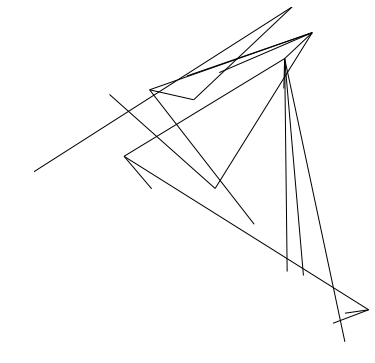

    After 20 iterations
        Discriminator Loss                         = -0.0374123118818

    Generator_Loss: 0.090763553977
201
    After 20 iterations
        Discriminator Loss                         = -0.0756891444325

    Generator_Loss: 0.0900142714381
202
    After 20 iterations
        Discriminator Loss                         = -0.0835433229804

    Generator_Loss: 0.0881680101156
203
    After 20 iterations
        Discriminator Loss                         = -0.0620838589966

    Generator_Loss: 0.107608579099
204
    After 20 iterations
        Discriminator Loss                         = -0.0233453232795

    Generator_Loss: 0.126623913646
205
    After 20 iterations
        Discriminator Loss                         = -0.0904789492488

    Generator_Loss: 0.081605643034
206
    After 20 iterations
        Discriminator Loss                         = -0.036474622786

    Generator_Loss: 0.0597531870008
207
    After 20 iterations
        Discriminator Loss          

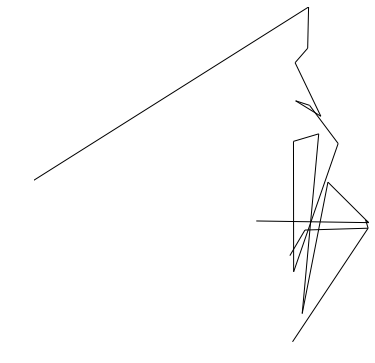

    After 20 iterations
        Discriminator Loss                         = 0.0160385463387

    Generator_Loss: 0.00884466804564
226
    After 20 iterations
        Discriminator Loss                         = -0.0414881370962

    Generator_Loss: -0.0187925379723
227
    After 20 iterations
        Discriminator Loss                         = -0.085402213037

    Generator_Loss: 0.0114063192159
228
    After 20 iterations
        Discriminator Loss                         = 0.045617390424

    Generator_Loss: -0.00684873573482
229
    After 20 iterations
        Discriminator Loss                         = -0.00218275631778

    Generator_Loss: -0.000357502023689
230
    After 20 iterations
        Discriminator Loss                         = 0.0296282954514

    Generator_Loss: -0.0102261966094
231
    After 20 iterations
        Discriminator Loss                         = -0.0523063130677

    Generator_Loss: -0.0117982141674
232
    After 20 iterations
        Discriminator Loss

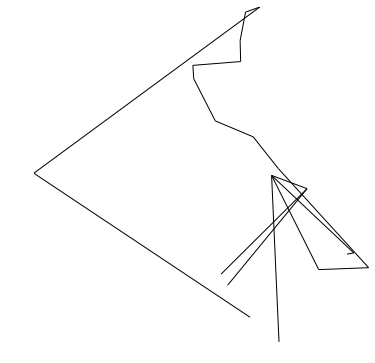

    After 20 iterations
        Discriminator Loss                         = 0.00975598674268

    Generator_Loss: 0.255259364843
251
    After 20 iterations
        Discriminator Loss                         = 0.0629135742784

    Generator_Loss: 0.145427629352
252
    After 20 iterations
        Discriminator Loss                         = 0.00335052749142

    Generator_Loss: 0.170237958431
253
    After 20 iterations
        Discriminator Loss                         = -0.00981584843248

    Generator_Loss: 0.129529997706
254
    After 20 iterations
        Discriminator Loss                         = -0.0927827507257

    Generator_Loss: 0.08751193434
255
    After 20 iterations
        Discriminator Loss                         = -0.0712538734078

    Generator_Loss: 0.0448110438883
256
    After 20 iterations
        Discriminator Loss                         = -0.128507092595

    Generator_Loss: -0.00204011774622
257
    After 20 iterations
        Discriminator Loss          

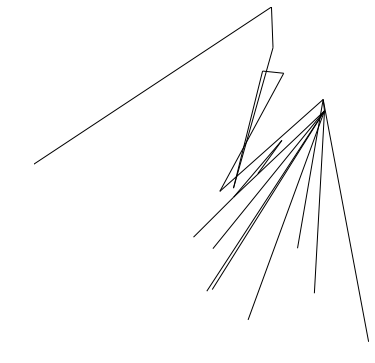

    After 20 iterations
        Discriminator Loss                         = 0.0571051761508

    Generator_Loss: -0.166648477316
276
    After 20 iterations
        Discriminator Loss                         = -0.0542546734214

    Generator_Loss: -0.18908663094
277
    After 20 iterations
        Discriminator Loss                         = -0.0246909037232

    Generator_Loss: -0.231708690524
278
    After 20 iterations
        Discriminator Loss                         = 0.0473158024251

    Generator_Loss: -0.252559959888
279
    After 20 iterations
        Discriminator Loss                         = -0.063334658742

    Generator_Loss: -0.284649252892
280
    After 20 iterations
        Discriminator Loss                         = -0.0539551898837

    Generator_Loss: -0.28175792098
281
    After 20 iterations
        Discriminator Loss                         = -0.0497819818556

    Generator_Loss: -0.302377074957
282
    After 20 iterations
        Discriminator Loss          

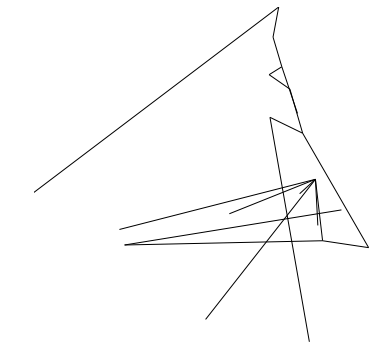

    After 20 iterations
        Discriminator Loss                         = -0.0277709793299

    Generator_Loss: -0.0377025641501
301
    After 20 iterations
        Discriminator Loss                         = -0.0878877788782

    Generator_Loss: -0.0184013973922
302
    After 20 iterations
        Discriminator Loss                         = -0.0887175947428

    Generator_Loss: -0.0808422714472
303
    After 20 iterations
        Discriminator Loss                         = -0.0511035881937

    Generator_Loss: -0.0771783664823
304
    After 20 iterations
        Discriminator Loss                         = -0.0331745371222

    Generator_Loss: -0.0876366347075
305
    After 20 iterations
        Discriminator Loss                         = -0.0367765501142

    Generator_Loss: -0.097842797637
306
    After 20 iterations
        Discriminator Loss                         = -0.106990873814

    Generator_Loss: -0.0890861526132
307
    After 20 iterations
        Discriminator Loss

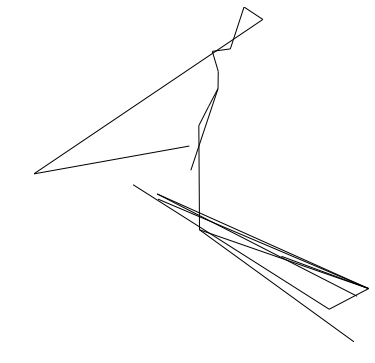

    After 20 iterations
        Discriminator Loss                         = -0.0850444510579

    Generator_Loss: -0.0988333150744
326
    After 20 iterations
        Discriminator Loss                         = -0.00999914295971

    Generator_Loss: -0.11783067137
327
    After 20 iterations
        Discriminator Loss                         = 0.0409230999649

    Generator_Loss: -0.140501722693
328
    After 20 iterations
        Discriminator Loss                         = -0.0262365192175

    Generator_Loss: -0.163606718183
329
    After 20 iterations
        Discriminator Loss                         = -0.0535961836576

    Generator_Loss: -0.154145658016
330
    After 20 iterations
        Discriminator Loss                         = -0.0649583637714

    Generator_Loss: -0.179703339934
331
    After 20 iterations
        Discriminator Loss                         = -0.0255079846829

    Generator_Loss: -0.149856895208
332
    After 20 iterations
        Discriminator Loss     

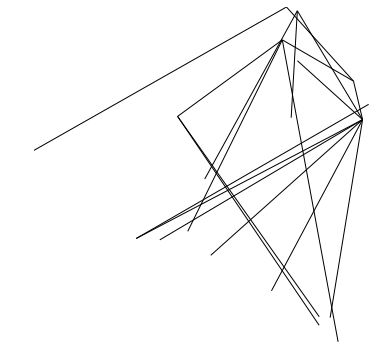

    After 20 iterations
        Discriminator Loss                         = -0.0253633633256

    Generator_Loss: 0.103969827294
351
    After 20 iterations
        Discriminator Loss                         = -0.0194130577147

    Generator_Loss: 0.0919811576605
352
    After 20 iterations
        Discriminator Loss                         = -0.0332655496895

    Generator_Loss: 0.124856725335
353
    After 20 iterations
        Discriminator Loss                         = 0.0133227035403

    Generator_Loss: 0.107558578253
354
    After 20 iterations
        Discriminator Loss                         = -0.0431368052959

    Generator_Loss: 0.128008753061
355
    After 20 iterations
        Discriminator Loss                         = 0.0431324765086

    Generator_Loss: 0.123067431152
356
    After 20 iterations
        Discriminator Loss                         = 0.00357809732668

    Generator_Loss: 0.106319457293
357
    After 20 iterations
        Discriminator Loss             

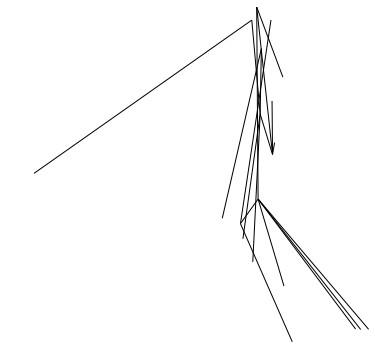

    After 20 iterations
        Discriminator Loss                         = -0.0295586697757

    Generator_Loss: -0.182716295123
376
    After 20 iterations
        Discriminator Loss                         = -0.0346253104508

    Generator_Loss: -0.192529916763
377
    After 20 iterations
        Discriminator Loss                         = -0.0697127431631

    Generator_Loss: -0.266589730978
378
    After 20 iterations
        Discriminator Loss                         = -0.0749460533261

    Generator_Loss: -0.246589004993
379
    After 20 iterations
        Discriminator Loss                         = 0.000803435745183

    Generator_Loss: -0.239032700658
380
    After 20 iterations
        Discriminator Loss                         = -0.0341247543693

    Generator_Loss: -0.255449831486
381
    After 20 iterations
        Discriminator Loss                         = -0.0290240608156

    Generator_Loss: -0.30749976635
382
    After 20 iterations
        Discriminator Loss     

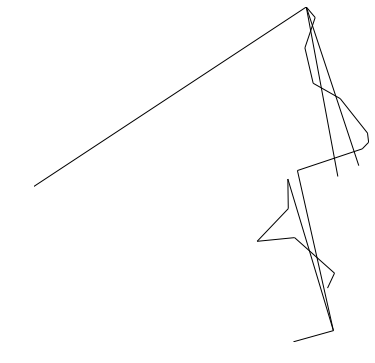

    After 20 iterations
        Discriminator Loss                         = -0.0542604066432

    Generator_Loss: 0.090310767293
401
    After 20 iterations
        Discriminator Loss                         = -0.0327437631786

    Generator_Loss: 0.105392180383
402
    After 20 iterations
        Discriminator Loss                         = -0.091494768858

    Generator_Loss: 0.105038173497
403
    After 20 iterations
        Discriminator Loss                         = 0.00499387737364

    Generator_Loss: 0.0696444511414
404
    After 20 iterations
        Discriminator Loss                         = -0.0300678890198

    Generator_Loss: 0.060803592205
405
    After 20 iterations
        Discriminator Loss                         = -0.0657187476754

    Generator_Loss: 0.0534767098725
406
    After 20 iterations
        Discriminator Loss                         = -0.0518563613296

    Generator_Loss: 0.0473576672375
407
    After 20 iterations
        Discriminator Loss          

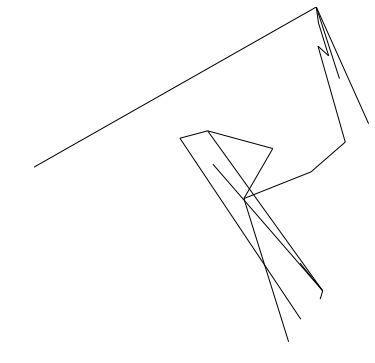

    After 20 iterations
        Discriminator Loss                         = -0.00895173754543

    Generator_Loss: -0.103265330195
426
    After 20 iterations
        Discriminator Loss                         = -0.0328707322478

    Generator_Loss: -0.115023568273
427
    After 20 iterations
        Discriminator Loss                         = -0.0060670026578

    Generator_Loss: -0.15741148591
428
    After 20 iterations
        Discriminator Loss                         = -0.0379433967173

    Generator_Loss: -0.183374062181
429
    After 20 iterations
        Discriminator Loss                         = -0.0321511551738

    Generator_Loss: -0.242226347327
430
    After 20 iterations
        Discriminator Loss                         = -0.0778990983963

    Generator_Loss: -0.254312455654
431
    After 20 iterations
        Discriminator Loss                         = -0.0132088204846

    Generator_Loss: -0.240878298879
432
    After 20 iterations
        Discriminator Loss     

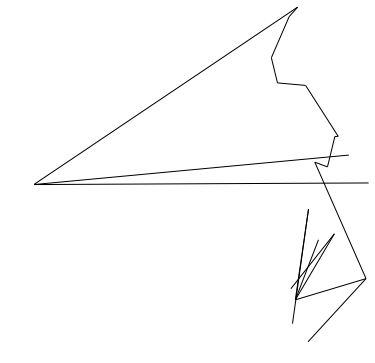

    After 20 iterations
        Discriminator Loss                         = -0.00908713415265

    Generator_Loss: 0.0358805693686
451
    After 20 iterations
        Discriminator Loss                         = 0.0168761108071

    Generator_Loss: 0.0159170329571
452
    After 20 iterations
        Discriminator Loss                         = -0.014021278359

    Generator_Loss: -0.0684750601649
453
    After 20 iterations
        Discriminator Loss                         = 0.00991138070822

    Generator_Loss: -0.0383811630309
454
    After 20 iterations
        Discriminator Loss                         = 0.00830100476742

    Generator_Loss: -0.116803534329
455
    After 20 iterations
        Discriminator Loss                         = -0.015708271414

    Generator_Loss: -0.154861852527
456
    After 20 iterations
        Discriminator Loss                         = 0.0042939633131

    Generator_Loss: -0.130523175001
457
    After 20 iterations
        Discriminator Loss      

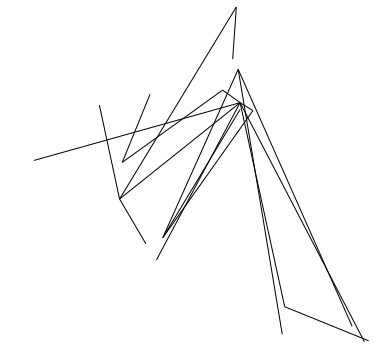

    After 20 iterations
        Discriminator Loss                         = -0.0369371958077

    Generator_Loss: -0.0255418121815
476
    After 20 iterations
        Discriminator Loss                         = -0.0556323155761

    Generator_Loss: 0.0274354331195
477
    After 20 iterations
        Discriminator Loss                         = -0.0048135491088

    Generator_Loss: 0.0451249890029
478
    After 20 iterations
        Discriminator Loss                         = -0.0614447332919

    Generator_Loss: -0.0155774550512
479
    After 20 iterations
        Discriminator Loss                         = -0.0639545321465

    Generator_Loss: -0.0444895997643
480
    After 20 iterations
        Discriminator Loss                         = 0.0418905690312

    Generator_Loss: -0.032550226897
481
    After 20 iterations
        Discriminator Loss                         = -0.0051530613564

    Generator_Loss: -0.0258849170059
482
    After 20 iterations
        Discriminator Loss  

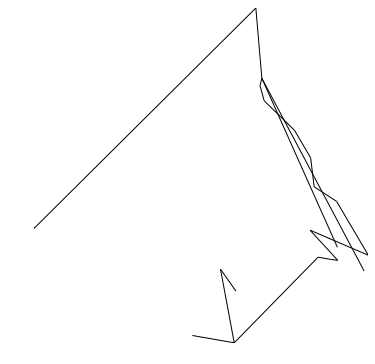

    After 20 iterations
        Discriminator Loss                         = 0.0371321812272

    Generator_Loss: -0.120160937309
501
    After 20 iterations
        Discriminator Loss                         = 0.0360151231289

    Generator_Loss: -0.0549381114542
502
    After 20 iterations
        Discriminator Loss                         = -0.0041565769352

    Generator_Loss: 0.00483114179224
503
    After 20 iterations
        Discriminator Loss                         = 0.00313749536872

    Generator_Loss: -0.0123092802241
504
    After 20 iterations
        Discriminator Loss                         = -0.0231284722686

    Generator_Loss: 0.00988504849374
505
    After 20 iterations
        Discriminator Loss                         = -0.0142946206033

    Generator_Loss: 0.0187455900013
506
    After 20 iterations
        Discriminator Loss                         = -0.00917334109545

    Generator_Loss: 0.0251203626394
507
    After 20 iterations
        Discriminator Loss  

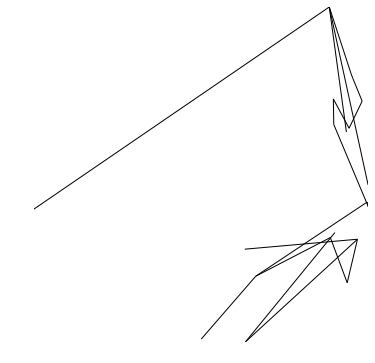

    After 20 iterations
        Discriminator Loss                         = -0.0490606948733

    Generator_Loss: -0.317858546972
526
    After 20 iterations
        Discriminator Loss                         = 0.0369922183454

    Generator_Loss: -0.309198111296
527
    After 20 iterations
        Discriminator Loss                         = -0.0997576862574

    Generator_Loss: -0.34635451436
528
    After 20 iterations
        Discriminator Loss                         = 0.000774213054683

    Generator_Loss: -0.316393733025
529
    After 20 iterations
        Discriminator Loss                         = -0.0672414824367

    Generator_Loss: -0.368689656258
530
    After 20 iterations
        Discriminator Loss                         = -0.0476754978299

    Generator_Loss: -0.379620373249
531
    After 20 iterations
        Discriminator Loss                         = -0.00371934915893

    Generator_Loss: -0.391833245754
532
    After 20 iterations
        Discriminator Loss     

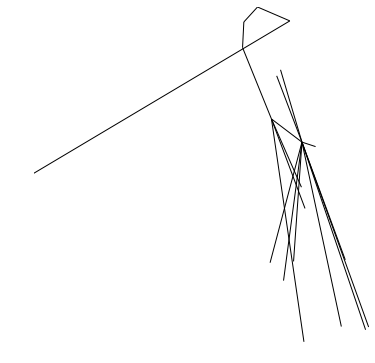

    After 20 iterations
        Discriminator Loss                         = -0.00787488371134

    Generator_Loss: -0.0638643801212
551
    After 20 iterations
        Discriminator Loss                         = -0.0552340038121

    Generator_Loss: -0.0240049678832
552
    After 20 iterations
        Discriminator Loss                         = 0.0175601318479

    Generator_Loss: 0.0130358925089
553
    After 20 iterations
        Discriminator Loss                         = 0.0147400749847

    Generator_Loss: 0.0122999437153
554
    After 20 iterations
        Discriminator Loss                         = -0.0182261262089

    Generator_Loss: 0.0216419696808
555
    After 20 iterations
        Discriminator Loss                         = 0.0101641491055

    Generator_Loss: 0.0615115761757
556
    After 20 iterations
        Discriminator Loss                         = -0.0400846116245

    Generator_Loss: 0.0522156059742
557
    After 20 iterations
        Discriminator Loss     

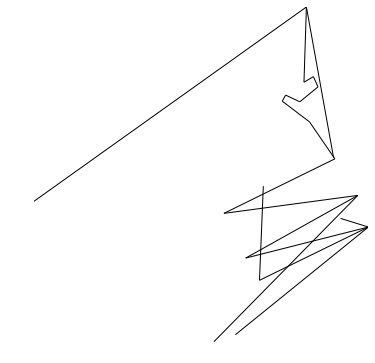

    After 20 iterations
        Discriminator Loss                         = -0.0201489292085

    Generator_Loss: -0.150556981564
576
    After 20 iterations
        Discriminator Loss                         = -0.0351583920419

    Generator_Loss: -0.207058489323
577
    After 20 iterations
        Discriminator Loss                         = -0.035931725055

    Generator_Loss: -0.204856067896
578
    After 20 iterations
        Discriminator Loss                         = -0.00739843398333

    Generator_Loss: -0.259076714516
579
    After 20 iterations
        Discriminator Loss                         = -0.0417326577008

    Generator_Loss: -0.264986127615
580
    After 20 iterations
        Discriminator Loss                         = 0.0398884341121

    Generator_Loss: -0.262046098709
581
    After 20 iterations
        Discriminator Loss                         = 0.0317995026708

    Generator_Loss: -0.278340965509
582
    After 20 iterations
        Discriminator Loss       

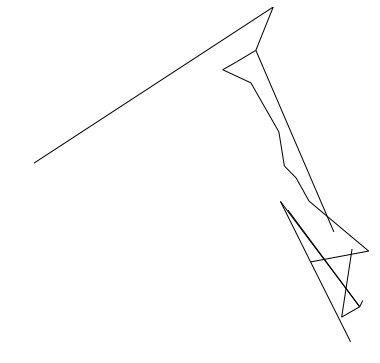

    After 20 iterations
        Discriminator Loss                         = -0.0336122326553

    Generator_Loss: -0.123904973269
601
    After 20 iterations
        Discriminator Loss                         = -0.0708037391305

    Generator_Loss: -0.147454664111
602
    After 20 iterations
        Discriminator Loss                         = -0.0139588015154

    Generator_Loss: -0.134156346321
603
    After 20 iterations
        Discriminator Loss                         = 0.0163610316813

    Generator_Loss: -0.145524561405
604
    After 20 iterations
        Discriminator Loss                         = -0.0614319257438

    Generator_Loss: -0.176007136703
605
    After 20 iterations
        Discriminator Loss                         = -0.0623231939971

    Generator_Loss: -0.151181355119
606
    After 20 iterations
        Discriminator Loss                         = -0.0800674036145

    Generator_Loss: -0.161748573184
607
    After 20 iterations
        Discriminator Loss      

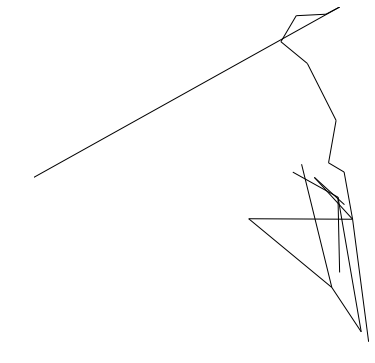

    After 20 iterations
        Discriminator Loss                         = -0.0507641732693

    Generator_Loss: 0.17319843173
626
    After 20 iterations
        Discriminator Loss                         = -0.0996529012918

    Generator_Loss: 0.153817370534
627
    After 20 iterations
        Discriminator Loss                         = -0.0232132673264

    Generator_Loss: 0.203426584601
628
    After 20 iterations
        Discriminator Loss                         = -0.075452953577

    Generator_Loss: 0.214145049453
629
    After 20 iterations
        Discriminator Loss                         = -0.0859655588865

    Generator_Loss: 0.218492299318
630
    After 20 iterations
        Discriminator Loss                         = -0.0838669911027

    Generator_Loss: 0.188580974936
631
    After 20 iterations
        Discriminator Loss                         = -0.0593307390809

    Generator_Loss: 0.204102694988
632
    After 20 iterations
        Discriminator Loss              

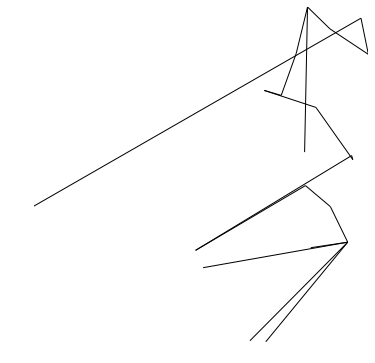

    After 20 iterations
        Discriminator Loss                         = 0.00796510186046

    Generator_Loss: -0.129386931658
651
    After 20 iterations
        Discriminator Loss                         = 0.00145382725168

    Generator_Loss: -0.155493408442
652
    After 20 iterations
        Discriminator Loss                         = 0.022982923314

    Generator_Loss: -0.131004169583
653
    After 20 iterations
        Discriminator Loss                         = -0.0326229222119

    Generator_Loss: -0.141768425703
654
    After 20 iterations
        Discriminator Loss                         = 0.00737351365387

    Generator_Loss: -0.114536128938
655
    After 20 iterations
        Discriminator Loss                         = -0.0664737299085

    Generator_Loss: -0.110692597926
656
    After 20 iterations
        Discriminator Loss                         = -0.0768979638815

    Generator_Loss: -0.0909171998501
657
    After 20 iterations
        Discriminator Loss      

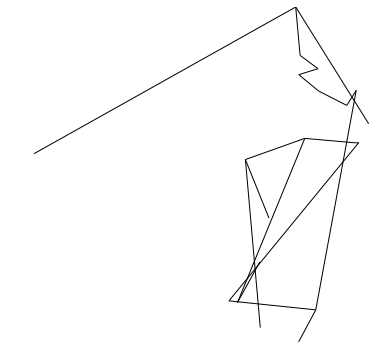

    After 20 iterations
        Discriminator Loss                         = -0.0188257806003

    Generator_Loss: -0.139652818441
676
    After 20 iterations
        Discriminator Loss                         = 0.00822143349797

    Generator_Loss: -0.178680881858
677
    After 20 iterations
        Discriminator Loss                         = -0.074311196804

    Generator_Loss: -0.200682997704
678
    After 20 iterations
        Discriminator Loss                         = 0.00757278688252

    Generator_Loss: -0.278286635876
679
    After 20 iterations
        Discriminator Loss                         = -0.0561424531043

    Generator_Loss: -0.234393283725
680
    After 20 iterations
        Discriminator Loss                         = -0.112414285541

    Generator_Loss: -0.251762270927
681
    After 20 iterations
        Discriminator Loss                         = -0.0161128677428

    Generator_Loss: -0.303413450718
682
    After 20 iterations
        Discriminator Loss       

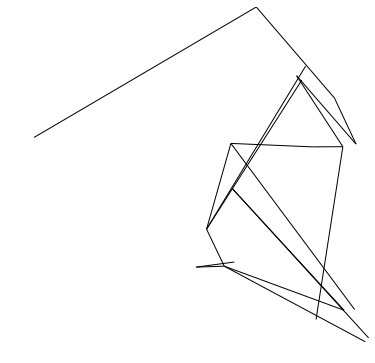

    After 20 iterations
        Discriminator Loss                         = -0.056929603219

    Generator_Loss: 0.0942231118679
701
    After 20 iterations
        Discriminator Loss                         = -0.0695043280721

    Generator_Loss: 0.0871976912022
702
    After 20 iterations
        Discriminator Loss                         = -0.0436630062759

    Generator_Loss: 0.0896484553814
703
    After 20 iterations
        Discriminator Loss                         = -0.0463026501238

    Generator_Loss: 0.0698926523328
704
    After 20 iterations
        Discriminator Loss                         = -0.101510763168

    Generator_Loss: 0.0423758812249
705
    After 20 iterations
        Discriminator Loss                         = -0.0558788403869

    Generator_Loss: 0.0533440746367
706
    After 20 iterations
        Discriminator Loss                         = -0.0230561345816

    Generator_Loss: 0.0093170106411
707
    After 20 iterations
        Discriminator Loss       

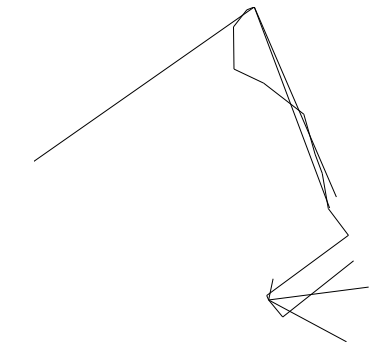

    After 20 iterations
        Discriminator Loss                         = -0.0430796667933

    Generator_Loss: -0.279240369797
726
    After 20 iterations
        Discriminator Loss                         = -0.0787428915501

    Generator_Loss: -0.234066098928
727
    After 20 iterations
        Discriminator Loss                         = 0.0350856557488

    Generator_Loss: -0.218881994486
728
    After 20 iterations
        Discriminator Loss                         = -0.073623880744

    Generator_Loss: -0.245394334197
729
    After 20 iterations
        Discriminator Loss                         = -0.0214434769005

    Generator_Loss: -0.223626643419
730
    After 20 iterations
        Discriminator Loss                         = -0.0503956116736

    Generator_Loss: -0.239333465695
731
    After 20 iterations
        Discriminator Loss                         = -0.00833534915

    Generator_Loss: -0.19856582582
732
    After 20 iterations
        Discriminator Loss          

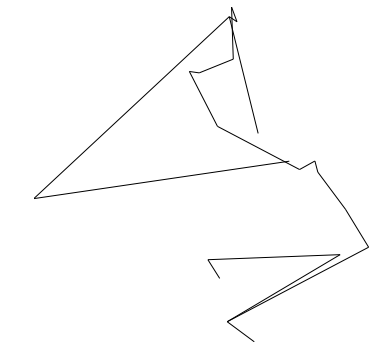

    After 20 iterations
        Discriminator Loss                         = 0.0222683474422

    Generator_Loss: -0.0569346398115
751
    After 20 iterations
        Discriminator Loss                         = -0.037470061332

    Generator_Loss: -0.0644471347332
752
    After 20 iterations
        Discriminator Loss                         = -0.0547473579645

    Generator_Loss: -0.0823314934969
753
    After 20 iterations
        Discriminator Loss                         = -0.0298222452402

    Generator_Loss: -0.0838438719511
754
    After 20 iterations
        Discriminator Loss                         = -0.0304187741131

    Generator_Loss: -0.0688300579786
755
    After 20 iterations
        Discriminator Loss                         = -0.010641945526

    Generator_Loss: -0.0609465427697
756
    After 20 iterations
        Discriminator Loss                         = -0.0298760440201

    Generator_Loss: -0.101621039212
757
    After 20 iterations
        Discriminator Loss  

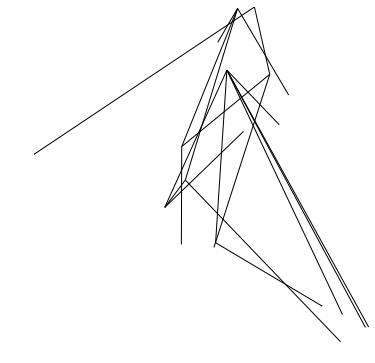

    After 20 iterations
        Discriminator Loss                         = 0.0072130667977

    Generator_Loss: 0.084311850369
776
    After 20 iterations
        Discriminator Loss                         = 0.00934843439609

    Generator_Loss: 0.0571740232408
777
    After 20 iterations
        Discriminator Loss                         = 0.00422377837822

    Generator_Loss: 0.0813317745924
778
    After 20 iterations
        Discriminator Loss                         = -0.0357733629644

    Generator_Loss: 0.0764485225081
779
    After 20 iterations
        Discriminator Loss                         = -0.00127619120758

    Generator_Loss: 0.0940937325358
780
    After 20 iterations
        Discriminator Loss                         = 0.0356194041669

    Generator_Loss: 0.103571817279
781

    Epoch #3

    After 20 iterations
        Discriminator Loss                         = -0.00660963263363

    Generator_Loss: 0.135349109769
2
    After 20 iterations
        Discriminator

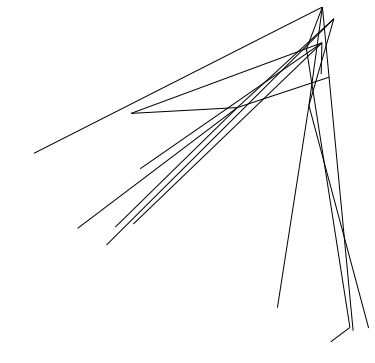

    After 20 iterations
        Discriminator Loss                         = -0.0215218774974

    Generator_Loss: -0.0346046425402
26
    After 20 iterations
        Discriminator Loss                         = -0.0126090915874

    Generator_Loss: -0.0388889610767
27
    After 20 iterations
        Discriminator Loss                         = -0.106775477529

    Generator_Loss: -0.0424905121326
28
    After 20 iterations
        Discriminator Loss                         = -0.0608629882336

    Generator_Loss: -0.0678962767124
29
    After 20 iterations
        Discriminator Loss                         = -0.0528673380613

    Generator_Loss: -0.106991618872
30
    After 20 iterations
        Discriminator Loss                         = -0.0495504848659

    Generator_Loss: -0.145747840405
31
    After 20 iterations
        Discriminator Loss                         = -0.0319985114038

    Generator_Loss: -0.166731193662
32
    After 20 iterations
        Discriminator Loss         

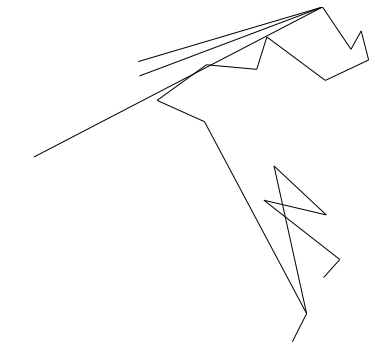

    After 20 iterations
        Discriminator Loss                         = -0.0724482163787

    Generator_Loss: -0.0234271865338
51
    After 20 iterations
        Discriminator Loss                         = -0.0520829893649

    Generator_Loss: -0.0379629023373
52
    After 20 iterations
        Discriminator Loss                         = -0.0118913576007

    Generator_Loss: -0.0144567806274
53
    After 20 iterations
        Discriminator Loss                         = -0.0375304929912

    Generator_Loss: 0.0165999904275
54
    After 20 iterations
        Discriminator Loss                         = 0.053796928376

    Generator_Loss: -0.00587233901024
55
    After 20 iterations
        Discriminator Loss                         = -0.0572234205902

    Generator_Loss: 0.00217050407082
56
    After 20 iterations
        Discriminator Loss                         = -0.083497710526

    Generator_Loss: 0.0277448035777
57
    After 20 iterations
        Discriminator Loss         

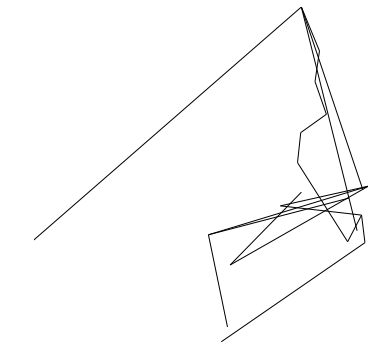

    After 20 iterations
        Discriminator Loss                         = 0.00159271375742

    Generator_Loss: -0.0696940943599
76
    After 20 iterations
        Discriminator Loss                         = -0.0365245379508

    Generator_Loss: -0.0504372157156
77
    After 20 iterations
        Discriminator Loss                         = -0.108324676752

    Generator_Loss: -0.0332820601761
78
    After 20 iterations
        Discriminator Loss                         = -0.0210740417242

    Generator_Loss: -0.0519667938352
79
    After 20 iterations
        Discriminator Loss                         = -0.0938667058945

    Generator_Loss: -0.0824747383595
80
    After 20 iterations
        Discriminator Loss                         = -0.0708557516336

    Generator_Loss: -0.118258371949
81
    After 20 iterations
        Discriminator Loss                         = -0.0829372182488

    Generator_Loss: -0.0736390724778
82
    After 20 iterations
        Discriminator Loss       

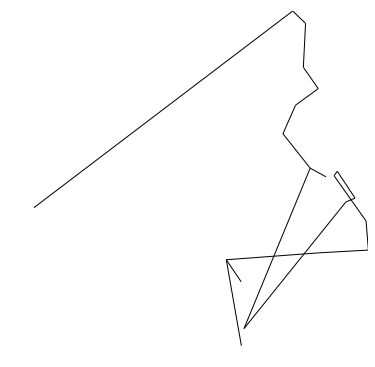

    After 20 iterations
        Discriminator Loss                         = -0.00574657414109

    Generator_Loss: 0.21224732697
101
    After 20 iterations
        Discriminator Loss                         = -0.0337276346982

    Generator_Loss: 0.227353915572
102
    After 20 iterations
        Discriminator Loss                         = 0.0072308355011

    Generator_Loss: 0.240655720234
103
    After 20 iterations
        Discriminator Loss                         = -0.0434751324356

    Generator_Loss: 0.26562038064
104
    After 20 iterations
        Discriminator Loss                         = 0.0505099706352

    Generator_Loss: 0.220719173551
105
    After 20 iterations
        Discriminator Loss                         = -0.0147693874314

    Generator_Loss: 0.220141515136
106
    After 20 iterations
        Discriminator Loss                         = -0.0183081366122

    Generator_Loss: 0.201994851232
107
    After 20 iterations
        Discriminator Loss               

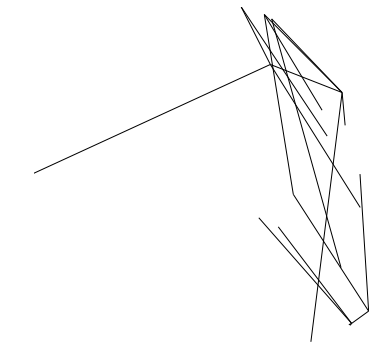

    After 20 iterations
        Discriminator Loss                         = -0.0725108459592

    Generator_Loss: 0.0706948786974
126
    After 20 iterations
        Discriminator Loss                         = -0.0615960694849

    Generator_Loss: 0.0388887450099
127
    After 20 iterations
        Discriminator Loss                         = -0.00926924683154

    Generator_Loss: 0.0478961244226
128
    After 20 iterations
        Discriminator Loss                         = 0.0223098322749

    Generator_Loss: 0.0152324652299
129
    After 20 iterations
        Discriminator Loss                         = -0.0239271223545

    Generator_Loss: -0.00670125009492
130
    After 20 iterations
        Discriminator Loss                         = -0.0243843663484

    Generator_Loss: -0.0249342806637
131
    After 20 iterations
        Discriminator Loss                         = 0.0305313188583

    Generator_Loss: -0.0372592136264
132
    After 20 iterations
        Discriminator Loss  

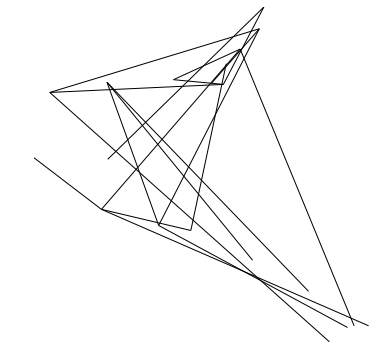

    After 20 iterations
        Discriminator Loss                         = -0.00391899468377

    Generator_Loss: 0.0603636428714
151
    After 20 iterations
        Discriminator Loss                         = 0.0353981889784

    Generator_Loss: 0.0310922767967
152
    After 20 iterations
        Discriminator Loss                         = -0.0163557380438

    Generator_Loss: 0.0444691739976
153
    After 20 iterations
        Discriminator Loss                         = -0.0281830076128

    Generator_Loss: 0.0597783178091
154
    After 20 iterations
        Discriminator Loss                         = -0.0561796687543

    Generator_Loss: 0.0758127868176
155
    After 20 iterations
        Discriminator Loss                         = -0.0351693853736

    Generator_Loss: 0.104078769684
156
    After 20 iterations
        Discriminator Loss                         = -0.00398689275607

    Generator_Loss: 0.118215642869
157
    After 20 iterations
        Discriminator Loss      

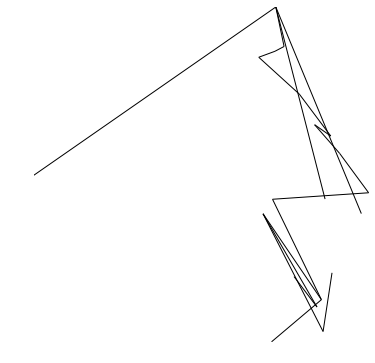

    After 20 iterations
        Discriminator Loss                         = 0.0450116507709

    Generator_Loss: -0.0286682583392
176
    After 20 iterations
        Discriminator Loss                         = -0.0932688713074

    Generator_Loss: -0.0768734589219
177
    After 20 iterations
        Discriminator Loss                         = 0.0570127777755

    Generator_Loss: -0.0411681011319
178
    After 20 iterations
        Discriminator Loss                         = -0.0206442214549

    Generator_Loss: -0.0262078903615
179
    After 20 iterations
        Discriminator Loss                         = 0.0218287818134

    Generator_Loss: -0.00339182652533
180
    After 20 iterations
        Discriminator Loss                         = -0.0226042643189

    Generator_Loss: 0.00681794108823
181
    After 20 iterations
        Discriminator Loss                         = 0.0412050746381

    Generator_Loss: 0.0286862645298
182
    After 20 iterations
        Discriminator Loss  

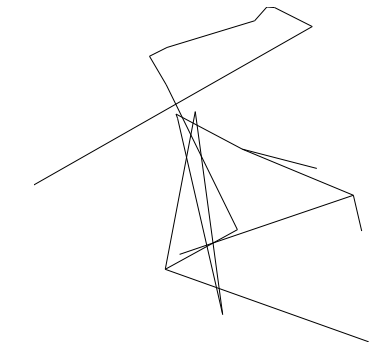

    After 20 iterations
        Discriminator Loss                         = -0.0043861111626

    Generator_Loss: -0.166622340679
201
    After 20 iterations
        Discriminator Loss                         = -0.031463522464

    Generator_Loss: -0.179911136627
202
    After 20 iterations
        Discriminator Loss                         = -0.0221725907177

    Generator_Loss: -0.171627536416
203
    After 20 iterations
        Discriminator Loss                         = -0.00406845426187

    Generator_Loss: -0.185644671321
204
    After 20 iterations
        Discriminator Loss                         = 0.0168254710734

    Generator_Loss: -0.17083543539
205
    After 20 iterations
        Discriminator Loss                         = -0.0188284739852

    Generator_Loss: -0.193950504065
206
    After 20 iterations
        Discriminator Loss                         = 0.0154934898019

    Generator_Loss: -0.179553493857
207
    After 20 iterations
        Discriminator Loss        

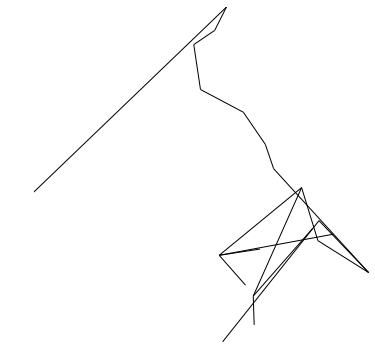

    After 20 iterations
        Discriminator Loss                         = 0.0323559977114

    Generator_Loss: 0.0911253765225
226
    After 20 iterations
        Discriminator Loss                         = -0.0341490544379

    Generator_Loss: 0.0972258895636
227
    After 20 iterations
        Discriminator Loss                         = -0.0314900912344

    Generator_Loss: 0.134402573109
228
    After 20 iterations
        Discriminator Loss                         = 0.00620542513207

    Generator_Loss: 0.119581073523
229
    After 20 iterations
        Discriminator Loss                         = -0.0340944416821

    Generator_Loss: 0.110603667796
230
    After 20 iterations
        Discriminator Loss                         = 0.0332735441625

    Generator_Loss: 0.102186486125
231
    After 20 iterations
        Discriminator Loss                         = -0.0581566877663

    Generator_Loss: 0.0739124640822
232
    After 20 iterations
        Discriminator Loss           

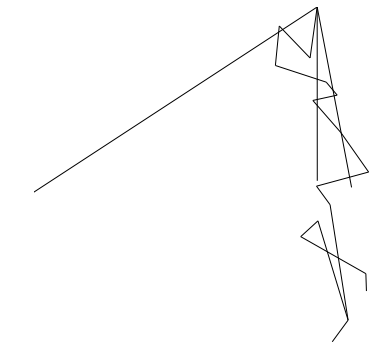

    After 20 iterations
        Discriminator Loss                         = -0.0226464122534

    Generator_Loss: -0.444857269526
251
    After 20 iterations
        Discriminator Loss                         = 0.0690880715847

    Generator_Loss: -0.42810946703
252
    After 20 iterations
        Discriminator Loss                         = -0.0122972186655

    Generator_Loss: -0.369566321373
253
    After 20 iterations
        Discriminator Loss                         = -0.0323813445866

    Generator_Loss: -0.438749134541
254
    After 20 iterations
        Discriminator Loss                         = -0.030754012987

    Generator_Loss: -0.38391032815
255
    After 20 iterations
        Discriminator Loss                         = -0.055837020278

    Generator_Loss: -0.317737460136
256
    After 20 iterations
        Discriminator Loss                         = -0.094018496573

    Generator_Loss: -0.355738043785
257
    After 20 iterations
        Discriminator Loss           

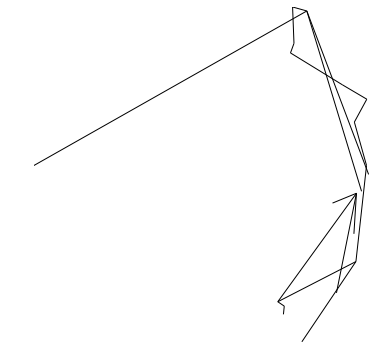

    After 20 iterations
        Discriminator Loss                         = 0.00795430224389

    Generator_Loss: 0.247619748116
276
    After 20 iterations
        Discriminator Loss                         = -0.0127477822825

    Generator_Loss: 0.241024166346
277
    After 20 iterations
        Discriminator Loss                         = -0.0268595423549

    Generator_Loss: 0.196853294969
278
    After 20 iterations
        Discriminator Loss                         = -0.028607616201

    Generator_Loss: 0.180629819632
279
    After 20 iterations
        Discriminator Loss                         = -0.101642280817

    Generator_Loss: 0.166397109628
280
    After 20 iterations
        Discriminator Loss                         = -0.0371240228415

    Generator_Loss: 0.152844592929
281
    After 20 iterations
        Discriminator Loss                         = -0.102732092142

    Generator_Loss: 0.124499849975
282
    After 20 iterations
        Discriminator Loss               

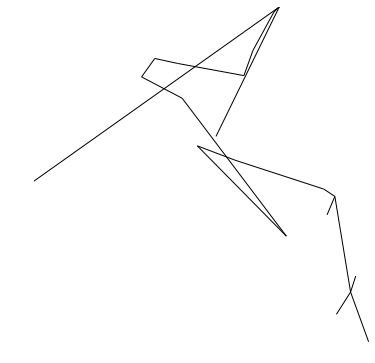

    After 20 iterations
        Discriminator Loss                         = -0.0498064532876

    Generator_Loss: -0.106923788786
301
    After 20 iterations
        Discriminator Loss                         = 0.00133618584368

    Generator_Loss: -0.139937341213
302
    After 20 iterations
        Discriminator Loss                         = -0.0243879444897

    Generator_Loss: -0.165812462568
303
    After 20 iterations
        Discriminator Loss                         = -0.0175089407712

    Generator_Loss: -0.223387673497
304
    After 20 iterations
        Discriminator Loss                         = -0.034746825695

    Generator_Loss: -0.246262013912
305
    After 20 iterations
        Discriminator Loss                         = -0.0785779953003

    Generator_Loss: -0.254632472992
306
    After 20 iterations
        Discriminator Loss                         = 0.0179157685488

    Generator_Loss: -0.229798361659
307
    After 20 iterations
        Discriminator Loss       

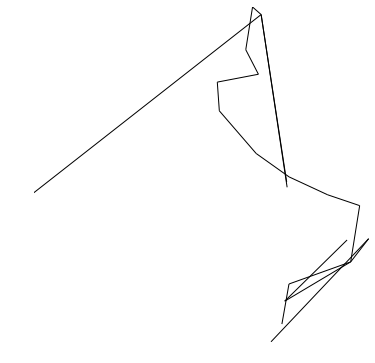

    After 20 iterations
        Discriminator Loss                         = -0.0536499768496

    Generator_Loss: 0.21650287509
326
    After 20 iterations
        Discriminator Loss                         = -0.0213125310838

    Generator_Loss: 0.258176356554
327
    After 20 iterations
        Discriminator Loss                         = 0.0804107412696

    Generator_Loss: 0.22039359808
328
    After 20 iterations
        Discriminator Loss                         = 0.00516184093431

    Generator_Loss: 0.206582382321
329
    After 20 iterations
        Discriminator Loss                         = -0.0199078340083

    Generator_Loss: 0.237147167325
330
    After 20 iterations
        Discriminator Loss                         = -0.0293523427099

    Generator_Loss: 0.210353806615
331
    After 20 iterations
        Discriminator Loss                         = -0.04930492118

    Generator_Loss: 0.208344608545
332
    After 20 iterations
        Discriminator Loss                 

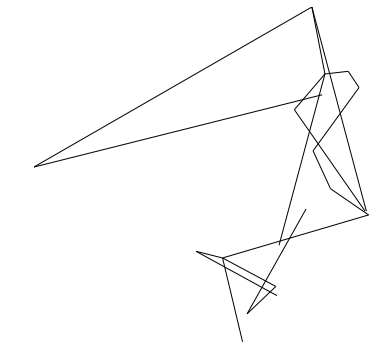

    After 20 iterations
        Discriminator Loss                         = -0.0254166405648

    Generator_Loss: -0.0852344483137
351
    After 20 iterations
        Discriminator Loss                         = 0.026267260313

    Generator_Loss: -0.0827722251415
352
    After 20 iterations
        Discriminator Loss                         = -0.0273298658431

    Generator_Loss: -0.0780636593699
353
    After 20 iterations
        Discriminator Loss                         = -0.0110416542739

    Generator_Loss: -0.039358958602
354
    After 20 iterations
        Discriminator Loss                         = -0.0426463633776

    Generator_Loss: -0.0517418310046
355
    After 20 iterations
        Discriminator Loss                         = 0.0041039166972

    Generator_Loss: -0.0305119231343
356
    After 20 iterations
        Discriminator Loss                         = -0.0213161576539

    Generator_Loss: -0.0876936167479
357
    After 20 iterations
        Discriminator Loss  

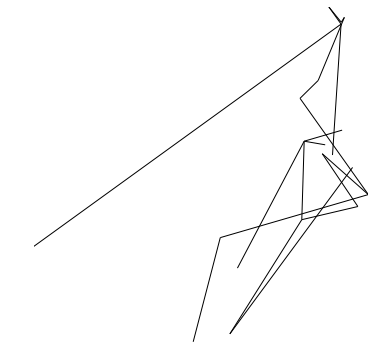

    After 20 iterations
        Discriminator Loss                         = 0.0130356475711

    Generator_Loss: -0.553828597069
376
    After 20 iterations
        Discriminator Loss                         = 0.0332701914012

    Generator_Loss: -0.529382348061
377
    After 20 iterations
        Discriminator Loss                         = -0.0738520473242

    Generator_Loss: -0.507503628731
378
    After 20 iterations
        Discriminator Loss                         = 0.011532577686

    Generator_Loss: -0.449142724276
379
    After 20 iterations
        Discriminator Loss                         = 0.00887150410563

    Generator_Loss: -0.37814232707
380
    After 20 iterations
        Discriminator Loss                         = -0.00880649220198

    Generator_Loss: -0.30791503191
381
    After 20 iterations
        Discriminator Loss                         = -0.0287177078426

    Generator_Loss: -0.275280147791
382
    After 20 iterations
        Discriminator Loss          

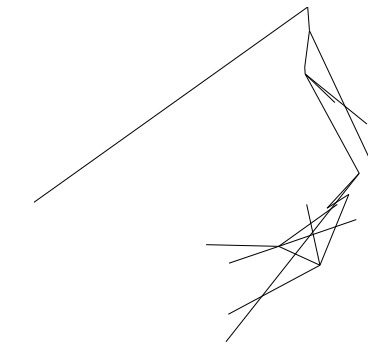

    After 20 iterations
        Discriminator Loss                         = -0.0278456825763

    Generator_Loss: 0.0614988431334
401
    After 20 iterations
        Discriminator Loss                         = -0.0489783659577

    Generator_Loss: 0.0700770244002
402
    After 20 iterations
        Discriminator Loss                         = -0.062323000282

    Generator_Loss: 0.0632323399186
403
    After 20 iterations
        Discriminator Loss                         = -0.0376439839602

    Generator_Loss: 0.0406373105943
404
    After 20 iterations
        Discriminator Loss                         = -0.0880976170301

    Generator_Loss: -0.00395828997716
405
    After 20 iterations
        Discriminator Loss                         = -0.113317295909

    Generator_Loss: -0.0381264574826
406
    After 20 iterations
        Discriminator Loss                         = -0.0977325662971

    Generator_Loss: -0.0280000437051
407
    After 20 iterations
        Discriminator Loss   

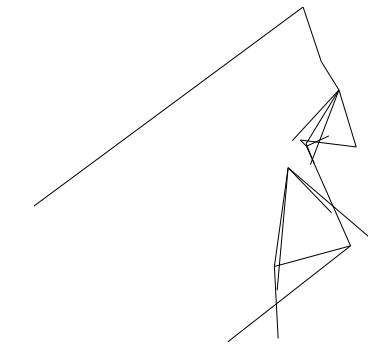

    After 20 iterations
        Discriminator Loss                         = -0.0210598669946

    Generator_Loss: 0.182182580233
426
    After 20 iterations
        Discriminator Loss                         = -0.0245201997459

    Generator_Loss: 0.172214448452
427
    After 20 iterations
        Discriminator Loss                         = 0.0777394548059

    Generator_Loss: 0.130390614271
428
    After 20 iterations
        Discriminator Loss                         = 0.0343079827726

    Generator_Loss: 0.151736289263
429
    After 20 iterations
        Discriminator Loss                         = 0.0246627964079

    Generator_Loss: 0.0548597611487
430
    After 20 iterations
        Discriminator Loss                         = 0.00547580374405

    Generator_Loss: 0.0906633809209
431
    After 20 iterations
        Discriminator Loss                         = -0.0119340140373

    Generator_Loss: 0.019501471892
432
    After 20 iterations
        Discriminator Loss             

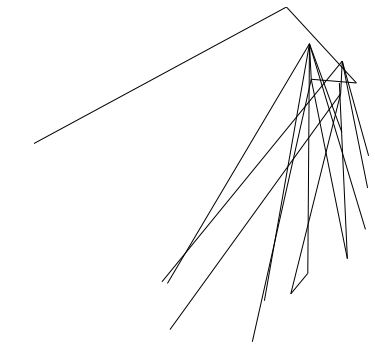

    After 20 iterations
        Discriminator Loss                         = -0.107254892588

    Generator_Loss: -0.255357831717
451
    After 20 iterations
        Discriminator Loss                         = -0.0661000981927

    Generator_Loss: -0.260683625937
452
    After 20 iterations
        Discriminator Loss                         = -0.0575257986784

    Generator_Loss: -0.281865477562
453
    After 20 iterations
        Discriminator Loss                         = -0.0152872744948

    Generator_Loss: -0.289760679007
454
    After 20 iterations
        Discriminator Loss                         = -0.0547594688833

    Generator_Loss: -0.342496812344
455
    After 20 iterations
        Discriminator Loss                         = -0.0636217370629

    Generator_Loss: -0.328409403563
456
    After 20 iterations
        Discriminator Loss                         = 0.0346231162548

    Generator_Loss: -0.389595150948
457
    After 20 iterations
        Discriminator Loss       

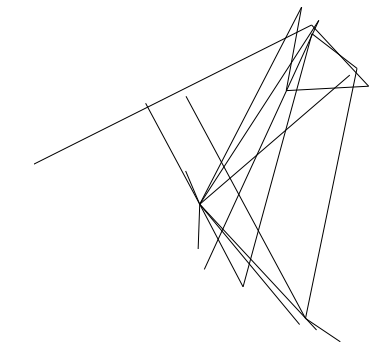

    After 20 iterations
        Discriminator Loss                         = 0.00927546527237

    Generator_Loss: -0.306158035994
476
    After 20 iterations
        Discriminator Loss                         = -0.020957717672

    Generator_Loss: -0.27483022213
477
    After 20 iterations
        Discriminator Loss                         = 0.00158451893367

    Generator_Loss: -0.234703734517
478
    After 20 iterations
        Discriminator Loss                         = -0.0657783076167

    Generator_Loss: -0.204190313816
479
    After 20 iterations
        Discriminator Loss                         = -0.00257029780187

    Generator_Loss: -0.176423251629
480
    After 20 iterations
        Discriminator Loss                         = 0.00406798068434

    Generator_Loss: -0.116374880075
481
    After 20 iterations
        Discriminator Loss                         = 0.0176071226597

    Generator_Loss: -0.0760198235512
482
    After 20 iterations
        Discriminator Loss      

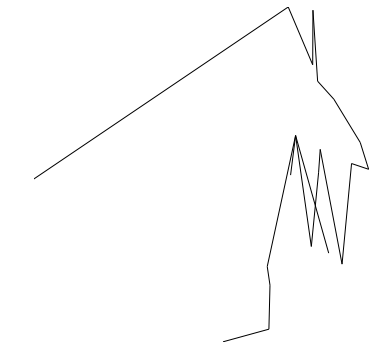

    After 20 iterations
        Discriminator Loss                         = -0.02805265598

    Generator_Loss: 0.380928426981
501
    After 20 iterations
        Discriminator Loss                         = -0.043222732842

    Generator_Loss: 0.338812679052
502
    After 20 iterations
        Discriminator Loss                         = -0.0499100014567

    Generator_Loss: 0.317840069532
503
    After 20 iterations
        Discriminator Loss                         = -0.043467592448

    Generator_Loss: 0.269226372242
504
    After 20 iterations
        Discriminator Loss                         = -0.0308490786701

    Generator_Loss: 0.230672240257
505
    After 20 iterations
        Discriminator Loss                         = -0.110195182264

    Generator_Loss: 0.231243550777
506
    After 20 iterations
        Discriminator Loss                         = -0.0494609512389

    Generator_Loss: 0.167775899172
507
    After 20 iterations
        Discriminator Loss                 

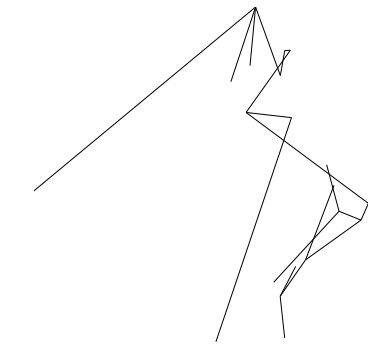

    After 20 iterations
        Discriminator Loss                         = -0.0555843152106

    Generator_Loss: -0.0179090425372
526
    After 20 iterations
        Discriminator Loss                         = 0.0135892061517

    Generator_Loss: -0.030489159748
527
    After 20 iterations
        Discriminator Loss                         = -0.0619938857853

    Generator_Loss: -0.115961536765
528
    After 20 iterations
        Discriminator Loss                         = -0.0218232944608

    Generator_Loss: -0.128696352243
529
    After 20 iterations
        Discriminator Loss                         = -0.0409198105335

    Generator_Loss: -0.198431327939
530
    After 20 iterations
        Discriminator Loss                         = -0.0531700365245

    Generator_Loss: -0.238800361753
531
    After 20 iterations
        Discriminator Loss                         = 0.0405671671033

    Generator_Loss: -0.283853888512
532
    After 20 iterations
        Discriminator Loss      

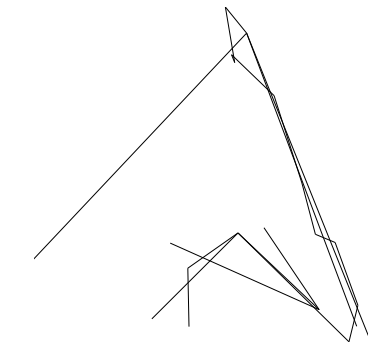

    After 20 iterations
        Discriminator Loss                         = -0.0224502906203

    Generator_Loss: -0.396954417229
551
    After 20 iterations
        Discriminator Loss                         = -0.0322949960828

    Generator_Loss: -0.346364438534
552
    After 20 iterations
        Discriminator Loss                         = 0.0723811164498

    Generator_Loss: -0.317038595676
553
    After 20 iterations
        Discriminator Loss                         = -0.0167616046965

    Generator_Loss: -0.30264505744
554
    After 20 iterations
        Discriminator Loss                         = 0.0132720498368

    Generator_Loss: -0.253370970488
555
    After 20 iterations
        Discriminator Loss                         = 0.0161353219301

    Generator_Loss: -0.229214951396
556
    After 20 iterations
        Discriminator Loss                         = -0.0185979418457

    Generator_Loss: -0.205914437771
557
    After 20 iterations
        Discriminator Loss         

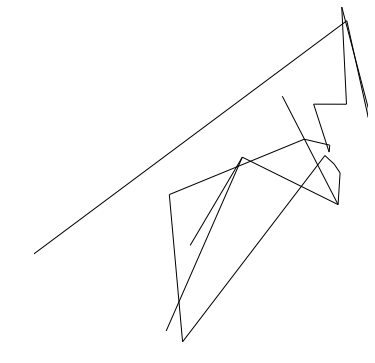

    After 20 iterations
        Discriminator Loss                         = -0.0868510529399

    Generator_Loss: -0.234245970845
576
    After 20 iterations
        Discriminator Loss                         = -0.0361209362745

    Generator_Loss: -0.255513727665
577
    After 20 iterations
        Discriminator Loss                         = -0.00434981659055

    Generator_Loss: -0.217392742634
578
    After 20 iterations
        Discriminator Loss                         = -0.0135216945782

    Generator_Loss: -0.188109636307
579
    After 20 iterations
        Discriminator Loss                         = -0.0210901070386

    Generator_Loss: -0.150894060731
580
    After 20 iterations
        Discriminator Loss                         = -0.00240033934824

    Generator_Loss: -0.135999187827
581
    After 20 iterations
        Discriminator Loss                         = 0.00291397050023

    Generator_Loss: -0.0946352556348
582
    After 20 iterations
        Discriminator Loss  

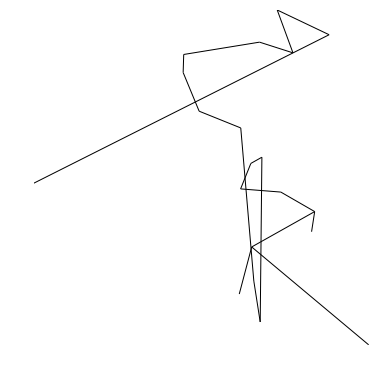

    After 20 iterations
        Discriminator Loss                         = -0.0500495620072

    Generator_Loss: -0.0616168640554
601
    After 20 iterations
        Discriminator Loss                         = -0.0686672776937

    Generator_Loss: -0.095451541245
602
    After 20 iterations
        Discriminator Loss                         = -0.0799642950296

    Generator_Loss: -0.0886227265
603
    After 20 iterations
        Discriminator Loss                         = -0.0343277491629

    Generator_Loss: -0.0886953920126
604
    After 20 iterations
        Discriminator Loss                         = 0.000366942113033

    Generator_Loss: -0.112672321498
605
    After 20 iterations
        Discriminator Loss                         = -0.0226501747966

    Generator_Loss: -0.0996708348393
606
    After 20 iterations
        Discriminator Loss                         = -0.11951135844

    Generator_Loss: -0.0765868350863
607
    After 20 iterations
        Discriminator Loss    

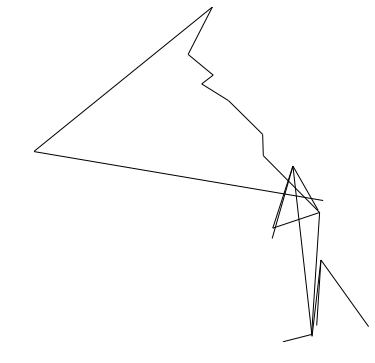

    After 20 iterations
        Discriminator Loss                         = -0.0323537737131

    Generator_Loss: -0.0509202182293
626
    After 20 iterations
        Discriminator Loss                         = -0.0573301948607

    Generator_Loss: -0.0638783201575
627
    After 20 iterations
        Discriminator Loss                         = 0.0030453291256

    Generator_Loss: -0.0742041394114
628
    After 20 iterations
        Discriminator Loss                         = -0.00911810342222

    Generator_Loss: -0.0835426449776
629
    After 20 iterations
        Discriminator Loss                         = -0.0254465620965

    Generator_Loss: -0.0644396841526
630
    After 20 iterations
        Discriminator Loss                         = -0.0944415256381

    Generator_Loss: -0.100615754724
631
    After 20 iterations
        Discriminator Loss                         = -0.0401088446379

    Generator_Loss: -0.0741730108857
632
    After 20 iterations
        Discriminator Los

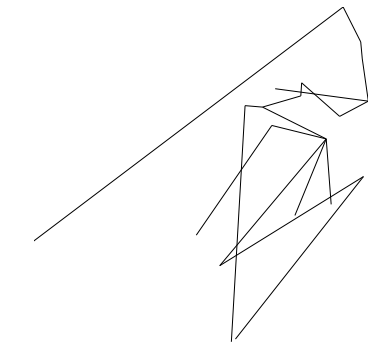

    After 20 iterations
        Discriminator Loss                         = -0.000628843903542

    Generator_Loss: -0.300888627768
651
    After 20 iterations
        Discriminator Loss                         = -0.0145205883309

    Generator_Loss: -0.305406808853
652
    After 20 iterations
        Discriminator Loss                         = 0.02660362795

    Generator_Loss: -0.278916448355
653
    After 20 iterations
        Discriminator Loss                         = -0.0113924602047

    Generator_Loss: -0.276493936777
654
    After 20 iterations
        Discriminator Loss                         = -0.0363133437932

    Generator_Loss: -0.276311010122
655
    After 20 iterations
        Discriminator Loss                         = -0.0439548231661

    Generator_Loss: -0.287091881037
656
    After 20 iterations
        Discriminator Loss                         = -0.060790874064

    Generator_Loss: -0.312587171793
657
    After 20 iterations
        Discriminator Loss       

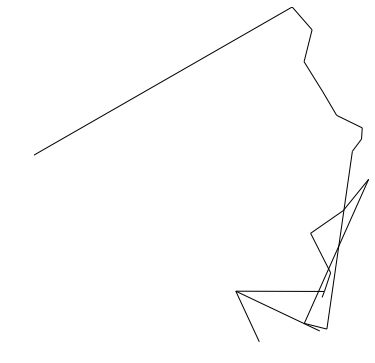

    After 20 iterations
        Discriminator Loss                         = 0.00271978462115

    Generator_Loss: -0.117545776069
676
    After 20 iterations
        Discriminator Loss                         = -0.0579618290067

    Generator_Loss: -0.0726701766253
677
    After 20 iterations
        Discriminator Loss                         = -0.0430622510612

    Generator_Loss: 0.0175120830536
678
    After 20 iterations
        Discriminator Loss                         = -0.0552624352276

    Generator_Loss: 0.0059443837963
679
    After 20 iterations
        Discriminator Loss                         = -0.082822650671

    Generator_Loss: 0.0846956223249
680
    After 20 iterations
        Discriminator Loss                         = -0.102182932198

    Generator_Loss: 0.108548216522
681
    After 20 iterations
        Discriminator Loss                         = -0.051886882633

    Generator_Loss: 0.114878959954
682
    After 20 iterations
        Discriminator Loss         

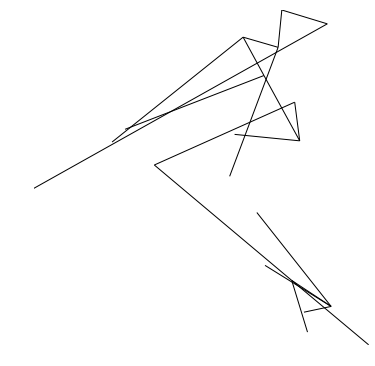

    After 20 iterations
        Discriminator Loss                         = -0.0573389530182

    Generator_Loss: -0.127061143517
701
    After 20 iterations
        Discriminator Loss                         = -0.0953210517764

    Generator_Loss: -0.12675331533
702
    After 20 iterations
        Discriminator Loss                         = -0.0158262327313

    Generator_Loss: -0.104709558189
703
    After 20 iterations
        Discriminator Loss                         = -0.0211335401982

    Generator_Loss: -0.12698969245
704
    After 20 iterations
        Discriminator Loss                         = -0.137212947011

    Generator_Loss: -0.130436509848
705
    After 20 iterations
        Discriminator Loss                         = -0.0281949266791

    Generator_Loss: -0.0837959423661
706
    After 20 iterations
        Discriminator Loss                         = -0.031903013587

    Generator_Loss: -0.104200340807
707
    After 20 iterations
        Discriminator Loss        

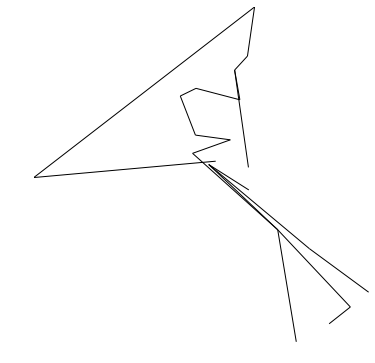

    After 20 iterations
        Discriminator Loss                         = -0.00705799926072

    Generator_Loss: -0.167139962316
726
    After 20 iterations
        Discriminator Loss                         = -0.0851533561945

    Generator_Loss: -0.191290512681
727
    After 20 iterations
        Discriminator Loss                         = 0.0364026576281

    Generator_Loss: -0.213252350688
728
    After 20 iterations
        Discriminator Loss                         = -0.0618592239916

    Generator_Loss: -0.26014867425
729
    After 20 iterations
        Discriminator Loss                         = -0.0255403704941

    Generator_Loss: -0.280672311783
730
    After 20 iterations
        Discriminator Loss                         = -0.0626498907804

    Generator_Loss: -0.283129006624
731
    After 20 iterations
        Discriminator Loss                         = 0.0184313151985

    Generator_Loss: -0.310649603605
732
    After 20 iterations
        Discriminator Loss       

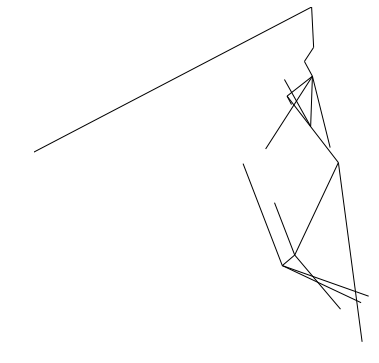

    After 20 iterations
        Discriminator Loss                         = 0.0360676683486

    Generator_Loss: -0.0353743955493
751
    After 20 iterations
        Discriminator Loss                         = -0.0472853966057

    Generator_Loss: -0.0882527679205
752
    After 20 iterations
        Discriminator Loss                         = -0.0243232827634

    Generator_Loss: -0.0715878680348
753
    After 20 iterations
        Discriminator Loss                         = -0.0486847534776

    Generator_Loss: -0.0809883624315
754
    After 20 iterations
        Discriminator Loss                         = 0.0120822070166

    Generator_Loss: -0.0936464816332
755
    After 20 iterations
        Discriminator Loss                         = -0.0384678281844

    Generator_Loss: -0.114785589278
756
    After 20 iterations
        Discriminator Loss                         = -0.0432740449905

    Generator_Loss: -0.149885296822
757
    After 20 iterations
        Discriminator Loss  

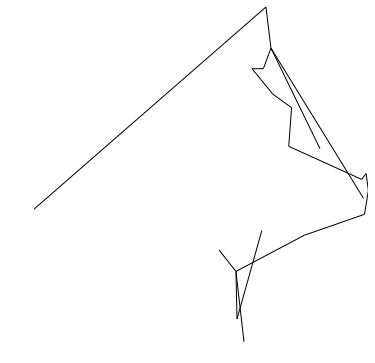

    After 20 iterations
        Discriminator Loss                         = -0.0806361660361

    Generator_Loss: -0.111670926213
776
    After 20 iterations
        Discriminator Loss                         = -0.0291851684451

    Generator_Loss: -0.06145741418
777
    After 20 iterations
        Discriminator Loss                         = -0.0522368587554

    Generator_Loss: -0.0882230475545
778
    After 20 iterations
        Discriminator Loss                         = -0.0477179512382

    Generator_Loss: -0.0818162485957
779
    After 20 iterations
        Discriminator Loss                         = 0.0319582372904

    Generator_Loss: -0.0358828864992
780
    After 20 iterations
        Discriminator Loss                         = -0.0559077858925

    Generator_Loss: -0.0757470205426
781

    Epoch #4

    After 20 iterations
        Discriminator Loss                         = -0.0499587580562

    Generator_Loss: -0.0931003838778
2
    After 20 iterations
        Discrim

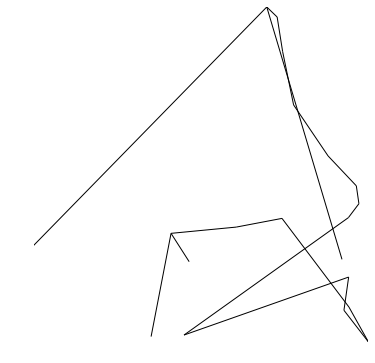

    After 20 iterations
        Discriminator Loss                         = -0.0880158916116

    Generator_Loss: 0.0425722785294
26
    After 20 iterations
        Discriminator Loss                         = -0.0472566969693

    Generator_Loss: 0.117611527443
27
    After 20 iterations
        Discriminator Loss                         = -0.0711995214224

    Generator_Loss: 0.116466335952
28
    After 20 iterations
        Discriminator Loss                         = -0.0564275532961

    Generator_Loss: 0.162166297436
29
    After 20 iterations
        Discriminator Loss                         = -0.0506581701338

    Generator_Loss: 0.0978125184774
30
    After 20 iterations
        Discriminator Loss                         = 0.0412554740906

    Generator_Loss: 0.0712696239352
31
    After 20 iterations
        Discriminator Loss                         = -0.0255013592541

    Generator_Loss: 0.0488805063069
32
    After 20 iterations
        Discriminator Loss                

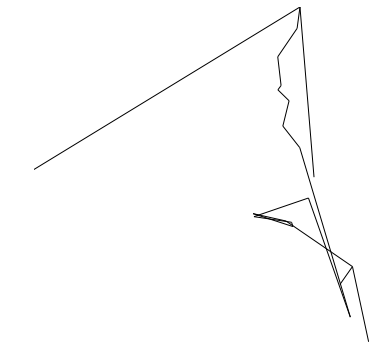

    After 20 iterations
        Discriminator Loss                         = 0.0325320959091

    Generator_Loss: -0.301553815603
51
    After 20 iterations
        Discriminator Loss                         = -0.0306410547346

    Generator_Loss: -0.335473656654
52
    After 20 iterations
        Discriminator Loss                         = -0.0105111449957

    Generator_Loss: -0.303058862686
53
    After 20 iterations
        Discriminator Loss                         = -0.0309519320726

    Generator_Loss: -0.309227824211
54
    After 20 iterations
        Discriminator Loss                         = 0.0370887592435

    Generator_Loss: -0.278843849897
55
    After 20 iterations
        Discriminator Loss                         = 0.0207574684173

    Generator_Loss: -0.261740714312
56
    After 20 iterations
        Discriminator Loss                         = 0.0289749540389

    Generator_Loss: -0.233397290111
57
    After 20 iterations
        Discriminator Loss                

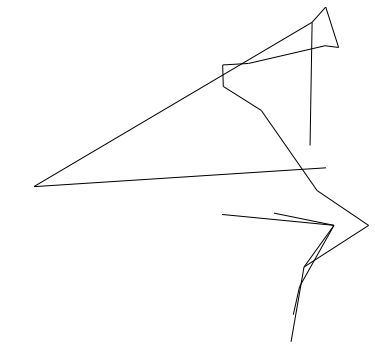

    After 20 iterations
        Discriminator Loss                         = 0.0225931331515

    Generator_Loss: -0.167526811361
76
    After 20 iterations
        Discriminator Loss                         = 0.0446199066937

    Generator_Loss: -0.177073210478
77
    After 20 iterations
        Discriminator Loss                         = -0.0638919994235

    Generator_Loss: -0.186922311783
78
    After 20 iterations
        Discriminator Loss                         = 0.0752917453647

    Generator_Loss: -0.194902166724
79
    After 20 iterations
        Discriminator Loss                         = -0.0246446654201

    Generator_Loss: -0.234650626779
80
    After 20 iterations
        Discriminator Loss                         = -0.0508843399584

    Generator_Loss: -0.283823996782
81
    After 20 iterations
        Discriminator Loss                         = 0.0123847546056

    Generator_Loss: -0.279560804367
82
    After 20 iterations
        Discriminator Loss                

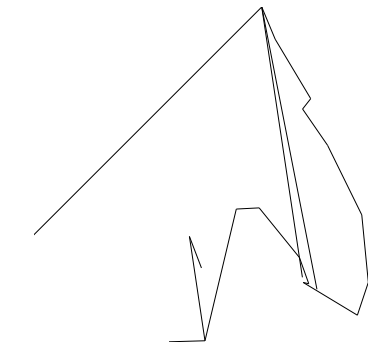

    After 20 iterations
        Discriminator Loss                         = -0.0768883377314

    Generator_Loss: 0.14147862792
101
    After 20 iterations
        Discriminator Loss                         = -0.0562338121235

    Generator_Loss: 0.0554782822728
102
    After 20 iterations
        Discriminator Loss                         = -0.0215876605362

    Generator_Loss: 0.148061618209
103
    After 20 iterations
        Discriminator Loss                         = -0.020986078307

    Generator_Loss: 0.138961330056
104
    After 20 iterations
        Discriminator Loss                         = 0.0134717328474

    Generator_Loss: 0.0988872274756
105
    After 20 iterations
        Discriminator Loss                         = -0.0288812667131

    Generator_Loss: 0.12807020545
106
    After 20 iterations
        Discriminator Loss                         = -0.0454274788499

    Generator_Loss: 0.039226282388
107
    After 20 iterations
        Discriminator Loss              

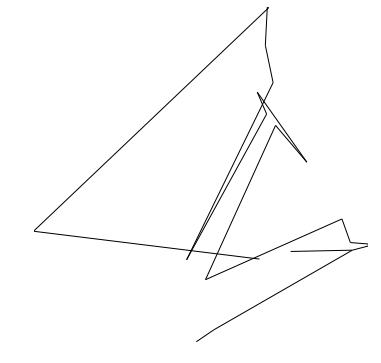

    After 20 iterations
        Discriminator Loss                         = 0.0414288602769

    Generator_Loss: -0.0227285493165
126
    After 20 iterations
        Discriminator Loss                         = 0.00707069644704

    Generator_Loss: 0.0178768578917
127
    After 20 iterations
        Discriminator Loss                         = 0.0176001600921

    Generator_Loss: 0.0123517075554
128
    After 20 iterations
        Discriminator Loss                         = -0.0135243637487

    Generator_Loss: 0.0682441368699
129
    After 20 iterations
        Discriminator Loss                         = -0.0191879533231

    Generator_Loss: 0.088862195611
130
    After 20 iterations
        Discriminator Loss                         = -0.0806215107441

    Generator_Loss: 0.117270380259
131
    After 20 iterations
        Discriminator Loss                         = -0.00862891040742

    Generator_Loss: 0.138266414404
132
    After 20 iterations
        Discriminator Loss        

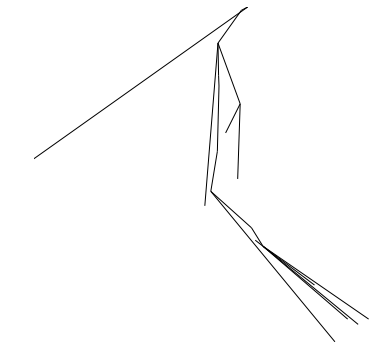

    After 20 iterations
        Discriminator Loss                         = -0.034893322736

    Generator_Loss: -0.242216944695
151
    After 20 iterations
        Discriminator Loss                         = 0.00870049651712

    Generator_Loss: -0.261510431767
152
    After 20 iterations
        Discriminator Loss                         = -0.00512381689623

    Generator_Loss: -0.279614031315
153
    After 20 iterations
        Discriminator Loss                         = -0.00981118809432

    Generator_Loss: -0.260686635971
154
    After 20 iterations
        Discriminator Loss                         = 0.0374215319753

    Generator_Loss: -0.209411069751
155
    After 20 iterations
        Discriminator Loss                         = -0.0382187329233

    Generator_Loss: -0.193240597844
156
    After 20 iterations
        Discriminator Loss                         = -0.0444604344666

    Generator_Loss: -0.154773265123
157
    After 20 iterations
        Discriminator Loss     

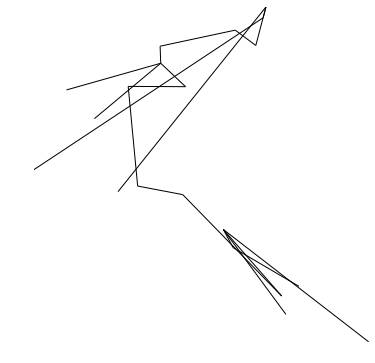

    After 20 iterations
        Discriminator Loss                         = 0.0356848351657

    Generator_Loss: 0.116279222071
176
    After 20 iterations
        Discriminator Loss                         = -0.0314671248198

    Generator_Loss: 0.0879233255982
177
    After 20 iterations
        Discriminator Loss                         = -0.055299334228

    Generator_Loss: 0.115028455853
178
    After 20 iterations
        Discriminator Loss                         = -0.0253565646708

    Generator_Loss: 0.131907209754
179
    After 20 iterations
        Discriminator Loss                         = -0.0178309641778

    Generator_Loss: 0.129129037261
180
    After 20 iterations
        Discriminator Loss                         = -0.0202437564731

    Generator_Loss: 0.105816960335
181
    After 20 iterations
        Discriminator Loss                         = 0.00479447608814

    Generator_Loss: 0.124430797994
182
    After 20 iterations
        Discriminator Loss             

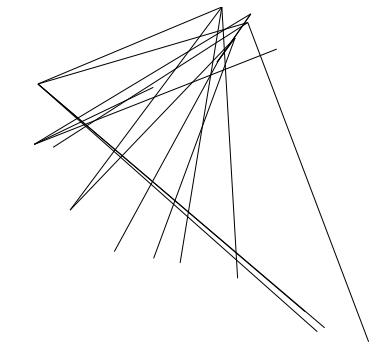

    After 20 iterations
        Discriminator Loss                         = -0.0596077144146

    Generator_Loss: 0.33741620183
201
    After 20 iterations
        Discriminator Loss                         = -0.157953992486

    Generator_Loss: 0.344696968794
202
    After 20 iterations
        Discriminator Loss                         = -0.0271407347172

    Generator_Loss: 0.315410882235
203
    After 20 iterations
        Discriminator Loss                         = -0.0704683512449

    Generator_Loss: 0.291922539473
204
    After 20 iterations
        Discriminator Loss                         = -0.0196990706027

    Generator_Loss: 0.292620003223
205
    After 20 iterations
        Discriminator Loss                         = -0.0104000205174

    Generator_Loss: 0.255748718977
206
    After 20 iterations
        Discriminator Loss                         = -0.0445572212338

    Generator_Loss: 0.248446315527
207
    After 20 iterations
        Discriminator Loss              

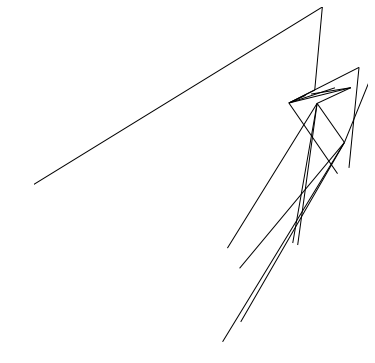

    After 20 iterations
        Discriminator Loss                         = 0.0278927180916

    Generator_Loss: -0.0326170213521
226
    After 20 iterations
        Discriminator Loss                         = 0.0127720152959

    Generator_Loss: -0.0289296805859
227
    After 20 iterations
        Discriminator Loss                         = -0.0337779819965

    Generator_Loss: 0.0125533826649
228
    After 20 iterations
        Discriminator Loss                         = -0.0144907329232

    Generator_Loss: 0.0495957918465
229
    After 20 iterations
        Discriminator Loss                         = -0.00698025897145

    Generator_Loss: 0.0610337182879
230
    After 20 iterations
        Discriminator Loss                         = 0.0097569283098

    Generator_Loss: 0.0652812942863
231
    After 20 iterations
        Discriminator Loss                         = -0.0513932332397

    Generator_Loss: 0.079656034708
232
    After 20 iterations
        Discriminator Loss      

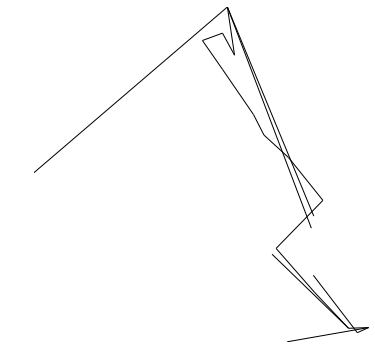

    After 20 iterations
        Discriminator Loss                         = 0.0265837348998

    Generator_Loss: -0.274075090885
251
    After 20 iterations
        Discriminator Loss                         = 0.0486491844058

    Generator_Loss: -0.323477625847
252
    After 20 iterations
        Discriminator Loss                         = 0.0121181784198

    Generator_Loss: -0.340984225273
253
    After 20 iterations
        Discriminator Loss                         = 0.023299260065

    Generator_Loss: -0.369787782431
254
    After 20 iterations
        Discriminator Loss                         = -0.0633576065302

    Generator_Loss: -0.404292404652
255
    After 20 iterations
        Discriminator Loss                         = -0.0435020029545

    Generator_Loss: -0.458099216223
256
    After 20 iterations
        Discriminator Loss                         = -0.0525505617261

    Generator_Loss: -0.453049331903
257
    After 20 iterations
        Discriminator Loss          

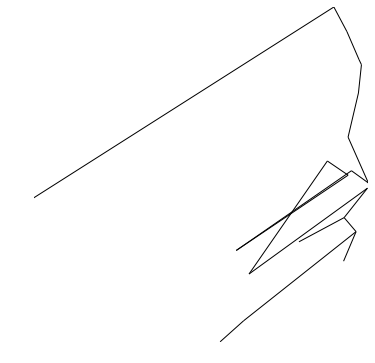

    After 20 iterations
        Discriminator Loss                         = 0.0621651038527

    Generator_Loss: -0.12544170022
276
    After 20 iterations
        Discriminator Loss                         = -0.00861692242324

    Generator_Loss: -0.166141420603
277
    After 20 iterations
        Discriminator Loss                         = -0.0243543293327

    Generator_Loss: -0.180659651756
278
    After 20 iterations
        Discriminator Loss                         = 0.0211581084877

    Generator_Loss: -0.187291517854
279
    After 20 iterations
        Discriminator Loss                         = -0.0510422624648

    Generator_Loss: -0.217142924666
280
    After 20 iterations
        Discriminator Loss                         = -0.013047655113

    Generator_Loss: -0.209239110351
281
    After 20 iterations
        Discriminator Loss                         = -0.0485580936074

    Generator_Loss: -0.215272337198
282
    After 20 iterations
        Discriminator Loss        

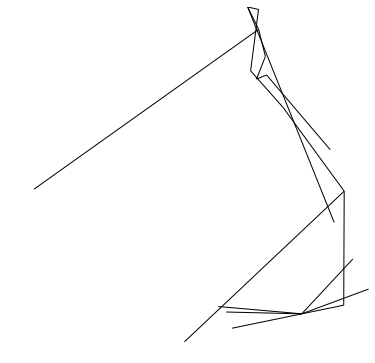

    After 20 iterations
        Discriminator Loss                         = 0.0198666993529

    Generator_Loss: -0.248061597347
301
    After 20 iterations
        Discriminator Loss                         = -0.00769580341876

    Generator_Loss: -0.188649147749
302
    After 20 iterations
        Discriminator Loss                         = -0.0103998845443

    Generator_Loss: -0.151884540915
303
    After 20 iterations
        Discriminator Loss                         = -0.015234272927

    Generator_Loss: -0.14976207912
304
    After 20 iterations
        Discriminator Loss                         = -0.0815749764442

    Generator_Loss: -0.069845892489
305
    After 20 iterations
        Discriminator Loss                         = -0.109267622232

    Generator_Loss: -0.0041570183821
306
    After 20 iterations
        Discriminator Loss                         = -0.077532351017

    Generator_Loss: 0.0396547466516
307
    After 20 iterations
        Discriminator Loss        

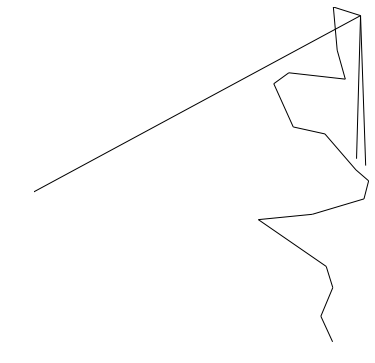

    After 20 iterations
        Discriminator Loss                         = -0.0565150566399

    Generator_Loss: -0.0730286985636
326
    After 20 iterations
        Discriminator Loss                         = -0.0380406677723

    Generator_Loss: -0.0487124063075
327
    After 20 iterations
        Discriminator Loss                         = 0.0434068180621

    Generator_Loss: -0.0696682780981
328
    After 20 iterations
        Discriminator Loss                         = -3.64624356735e-05

    Generator_Loss: -0.122044369578
329
    After 20 iterations
        Discriminator Loss                         = -0.0162348579615

    Generator_Loss: -0.0841364338994
330
    After 20 iterations
        Discriminator Loss                         = -0.0415540002286

    Generator_Loss: -0.08887976408
331
    After 20 iterations
        Discriminator Loss                         = -0.0438469238579

    Generator_Loss: -0.0879422128201
332
    After 20 iterations
        Discriminator Loss

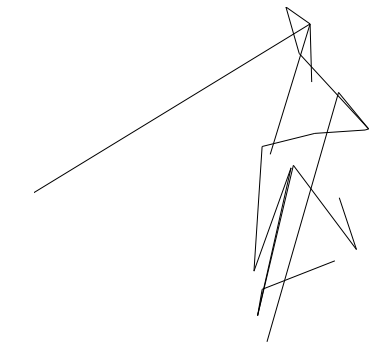

    After 20 iterations
        Discriminator Loss                         = -0.0125257233158

    Generator_Loss: -0.0371580012143
351
    After 20 iterations
        Discriminator Loss                         = -0.000603275897447

    Generator_Loss: -0.0430159792304
352
    After 20 iterations
        Discriminator Loss                         = -0.00909775774926

    Generator_Loss: -0.0513159520924
353
    After 20 iterations
        Discriminator Loss                         = 0.0368208959699

    Generator_Loss: -0.0663018673658
354
    After 20 iterations
        Discriminator Loss                         = -0.0194431245327

    Generator_Loss: -0.0652610734105
355
    After 20 iterations
        Discriminator Loss                         = 0.00217301445082

    Generator_Loss: -0.105667881668
356
    After 20 iterations
        Discriminator Loss                         = -0.0192065872252

    Generator_Loss: -0.124431110919
357
    After 20 iterations
        Discriminator Lo

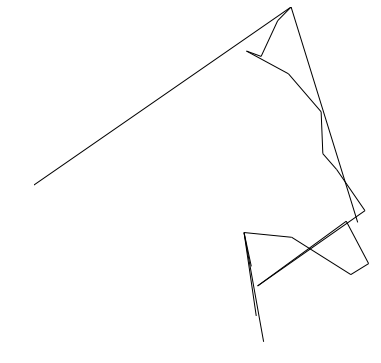

    After 20 iterations
        Discriminator Loss                         = 0.0014433026081

    Generator_Loss: -0.0526660941541
376
    After 20 iterations
        Discriminator Loss                         = -0.0769269242883

    Generator_Loss: -0.0318804495037
377
    After 20 iterations
        Discriminator Loss                         = -0.0914269834757

    Generator_Loss: -0.0484275110066
378
    After 20 iterations
        Discriminator Loss                         = -0.0370744802058

    Generator_Loss: -0.0213210526854
379
    After 20 iterations
        Discriminator Loss                         = 0.023844063282

    Generator_Loss: -0.0225614588708
380
    After 20 iterations
        Discriminator Loss                         = 0.0468896180391

    Generator_Loss: -0.0520706400275
381
    After 20 iterations
        Discriminator Loss                         = -0.0105441445485

    Generator_Loss: -0.0504560917616
382
    After 20 iterations
        Discriminator Loss  

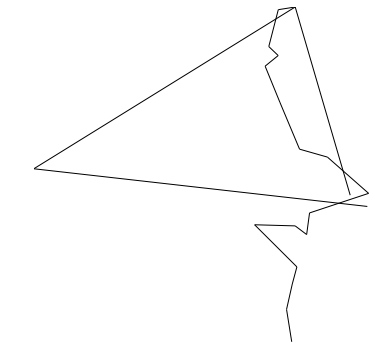

    After 20 iterations
        Discriminator Loss                         = -0.021596044302

    Generator_Loss: -0.00355832907371
401
    After 20 iterations
        Discriminator Loss                         = -0.0142881218344

    Generator_Loss: 0.064996406436
402
    After 20 iterations
        Discriminator Loss                         = -0.0997578427196

    Generator_Loss: 0.0964306816459
403
    After 20 iterations
        Discriminator Loss                         = 0.00308655831032

    Generator_Loss: 0.0626763924956
404
    After 20 iterations
        Discriminator Loss                         = -0.0564611554146

    Generator_Loss: 0.0891848355532
405
    After 20 iterations
        Discriminator Loss                         = -0.0759391635656

    Generator_Loss: 0.108749508858
406
    After 20 iterations
        Discriminator Loss                         = -0.0670652836561

    Generator_Loss: 0.0737336799502
407
    After 20 iterations
        Discriminator Loss      

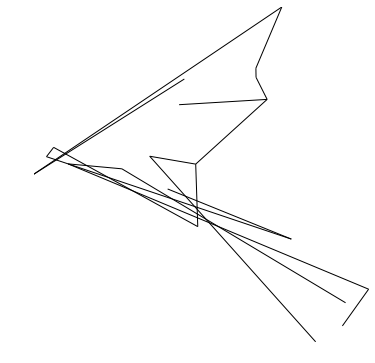

    After 20 iterations
        Discriminator Loss                         = 0.00326872221194

    Generator_Loss: -0.165976643562
426
    After 20 iterations
        Discriminator Loss                         = -0.0478122010827

    Generator_Loss: -0.172525271773
427
    After 20 iterations
        Discriminator Loss                         = -0.0176014602184

    Generator_Loss: -0.151856198907
428
    After 20 iterations
        Discriminator Loss                         = -0.0483451932669

    Generator_Loss: -0.109885573387
429
    After 20 iterations
        Discriminator Loss                         = -0.0755145251751

    Generator_Loss: -0.117102436721
430
    After 20 iterations
        Discriminator Loss                         = -0.0462506860495

    Generator_Loss: -0.0861299261451
431
    After 20 iterations
        Discriminator Loss                         = -0.0606016330421

    Generator_Loss: -0.0773482844234
432
    After 20 iterations
        Discriminator Loss   

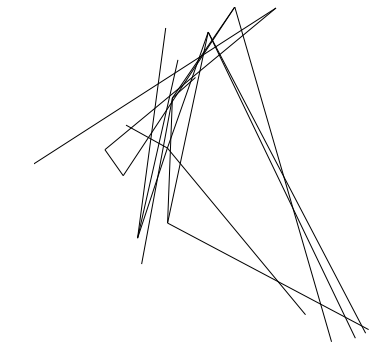

    After 20 iterations
        Discriminator Loss                         = -0.0166995096952

    Generator_Loss: -0.0900882780552
451
    After 20 iterations
        Discriminator Loss                         = 0.0190181899816

    Generator_Loss: -0.136120602489
452
    After 20 iterations
        Discriminator Loss                         = 0.00180105236359

    Generator_Loss: -0.206921860576
453
    After 20 iterations
        Discriminator Loss                         = 0.0628583580256

    Generator_Loss: -0.236793071032
454
    After 20 iterations
        Discriminator Loss                         = 0.00689590303227

    Generator_Loss: -0.169286966324
455
    After 20 iterations
        Discriminator Loss                         = 0.0312496442348

    Generator_Loss: -0.279499202967
456
    After 20 iterations
        Discriminator Loss                         = 0.101246371865

    Generator_Loss: -0.269017934799
457
    After 20 iterations
        Discriminator Loss         

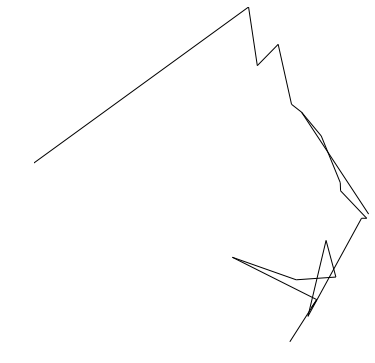

    After 20 iterations
        Discriminator Loss                         = 0.022886864841

    Generator_Loss: -0.13227199018
476
    After 20 iterations
        Discriminator Loss                         = 0.0107358749956

    Generator_Loss: -0.12157946825
477
    After 20 iterations
        Discriminator Loss                         = 0.00354283652268

    Generator_Loss: -0.090504579246
478
    After 20 iterations
        Discriminator Loss                         = 0.00328683992848

    Generator_Loss: -0.0919926911592
479
    After 20 iterations
        Discriminator Loss                         = -0.00848256330937

    Generator_Loss: -0.0834463909268
480
    After 20 iterations
        Discriminator Loss                         = 0.0111783100292

    Generator_Loss: -0.0646150633693
481
    After 20 iterations
        Discriminator Loss                         = 0.0160878095776

    Generator_Loss: -0.0542102903128
482
    After 20 iterations
        Discriminator Loss       

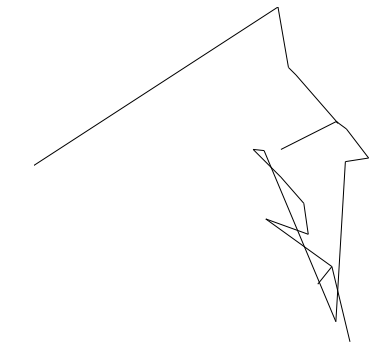

    After 20 iterations
        Discriminator Loss                         = -0.0413981825113

    Generator_Loss: 0.0297487583011
501
    After 20 iterations
        Discriminator Loss                         = -0.0321991816163

    Generator_Loss: 0.0165652465075
502
    After 20 iterations
        Discriminator Loss                         = -0.0795235484838

    Generator_Loss: 0.062828861177
503
    After 20 iterations
        Discriminator Loss                         = -0.0785197913647

    Generator_Loss: 0.0553659833968
504
    After 20 iterations
        Discriminator Loss                         = -0.0747391209006

    Generator_Loss: 0.0717862844467
505
    After 20 iterations
        Discriminator Loss                         = -0.0861334875226

    Generator_Loss: 0.141252160072
506
    After 20 iterations
        Discriminator Loss                         = -0.0482022836804

    Generator_Loss: 0.0634521469474
507
    After 20 iterations
        Discriminator Loss       

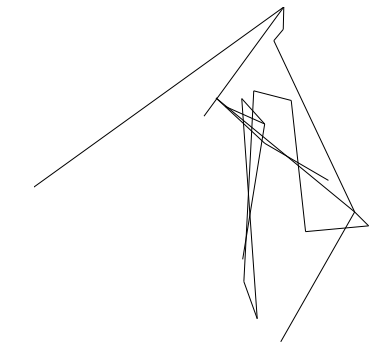

    After 20 iterations
        Discriminator Loss                         = -0.00058590923436

    Generator_Loss: 0.102007746696
526
    After 20 iterations
        Discriminator Loss                         = -0.0640789717436

    Generator_Loss: 0.051710229367
527
    After 20 iterations
        Discriminator Loss                         = -0.0391634292901

    Generator_Loss: 0.0830059349537
528
    After 20 iterations
        Discriminator Loss                         = 0.0173674672842

    Generator_Loss: 0.0815653949976
529
    After 20 iterations
        Discriminator Loss                         = -0.0672057718039

    Generator_Loss: 0.0561376661062
530
    After 20 iterations
        Discriminator Loss                         = -0.0711868032813

    Generator_Loss: 0.0208591315895
531
    After 20 iterations
        Discriminator Loss                         = -0.0786338374019

    Generator_Loss: -0.0247708298266
532
    After 20 iterations
        Discriminator Loss      

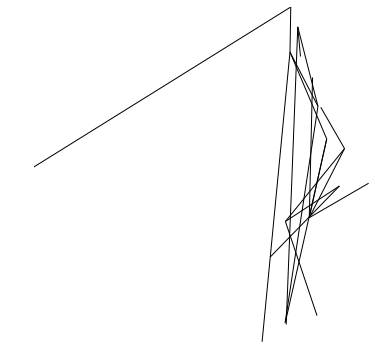

    After 20 iterations
        Discriminator Loss                         = -0.0931718274951

    Generator_Loss: -0.192757561803
551
    After 20 iterations
        Discriminator Loss                         = -0.0801349058747

    Generator_Loss: -0.170461773872
552
    After 20 iterations
        Discriminator Loss                         = -0.0392237082124

    Generator_Loss: -0.116471730173
553
    After 20 iterations
        Discriminator Loss                         = 0.0375802479684

    Generator_Loss: -0.128422811627
554
    After 20 iterations
        Discriminator Loss                         = -0.00993538741022

    Generator_Loss: -0.131430536509
555
    After 20 iterations
        Discriminator Loss                         = 0.0544282756746

    Generator_Loss: -0.0756722763181
556
    After 20 iterations
        Discriminator Loss                         = -0.0707065016031

    Generator_Loss: -0.110596545041
557
    After 20 iterations
        Discriminator Loss     

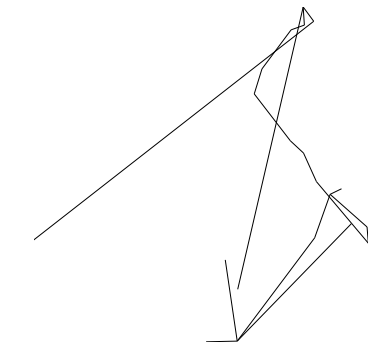

    After 20 iterations
        Discriminator Loss                         = -0.030015507713

    Generator_Loss: -0.295746326447
576
    After 20 iterations
        Discriminator Loss                         = -0.07070671767

    Generator_Loss: -0.229939505458
577
    After 20 iterations
        Discriminator Loss                         = 0.00467834481969

    Generator_Loss: -0.22074624896
578
    After 20 iterations
        Discriminator Loss                         = 0.0153150912374

    Generator_Loss: -0.233676239848
579
    After 20 iterations
        Discriminator Loss                         = 0.00161716493312

    Generator_Loss: -0.222268715501
580
    After 20 iterations
        Discriminator Loss                         = -0.00154101254884

    Generator_Loss: -0.223206102848
581
    After 20 iterations
        Discriminator Loss                         = 0.016160255298

    Generator_Loss: -0.15490321815
582
    After 20 iterations
        Discriminator Loss            

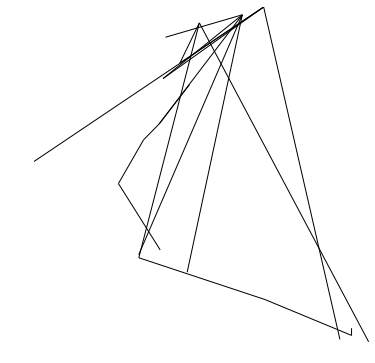

    After 20 iterations
        Discriminator Loss                         = -0.0534337498248

    Generator_Loss: -0.0500901117921
601
    After 20 iterations
        Discriminator Loss                         = 0.0114633608609

    Generator_Loss: -0.0718724429607
602
    After 20 iterations
        Discriminator Loss                         = 0.00872266944498

    Generator_Loss: -0.10160356015
603
    After 20 iterations
        Discriminator Loss                         = 0.00871647521853

    Generator_Loss: -0.131023302674
604
    After 20 iterations
        Discriminator Loss                         = 0.0224211402237

    Generator_Loss: -0.158887654543
605
    After 20 iterations
        Discriminator Loss                         = -0.0136702693999

    Generator_Loss: -0.17807982862
606
    After 20 iterations
        Discriminator Loss                         = -0.0517892725766

    Generator_Loss: -0.207125812769
607
    After 20 iterations
        Discriminator Loss       

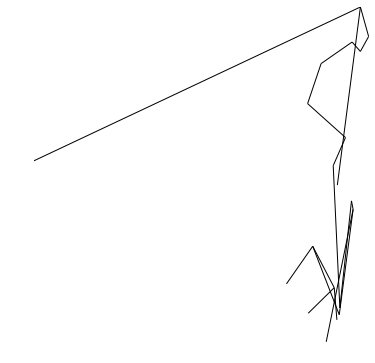

    After 20 iterations
        Discriminator Loss                         = -0.0439136698842

    Generator_Loss: 0.00304844416678
626
    After 20 iterations
        Discriminator Loss                         = -0.0474968850613

    Generator_Loss: 0.0164627339691
627
    After 20 iterations
        Discriminator Loss                         = -0.00844801682979

    Generator_Loss: 0.0409131161869
628
    After 20 iterations
        Discriminator Loss                         = -0.0240281093866

    Generator_Loss: 0.0774945244193
629
    After 20 iterations
        Discriminator Loss                         = -0.0190370865166

    Generator_Loss: 0.0752271339297
630
    After 20 iterations
        Discriminator Loss                         = -0.077486038208

    Generator_Loss: 0.0735776498914
631
    After 20 iterations
        Discriminator Loss                         = 0.0210021547973

    Generator_Loss: 0.0718606263399
632
    After 20 iterations
        Discriminator Loss     

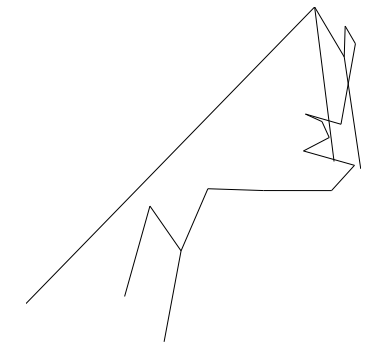

    After 20 iterations
        Discriminator Loss                         = -0.0268168728799

    Generator_Loss: -0.176553457975
651
    After 20 iterations
        Discriminator Loss                         = -0.00597941922024

    Generator_Loss: -0.183813557029
652
    After 20 iterations
        Discriminator Loss                         = 0.00629147421569

    Generator_Loss: -0.165668174624
653
    After 20 iterations
        Discriminator Loss                         = -0.101843237877

    Generator_Loss: -0.122383281589
654
    After 20 iterations
        Discriminator Loss                         = -0.0401496253908

    Generator_Loss: -0.136192455888
655
    After 20 iterations
        Discriminator Loss                         = -0.0379882529378

    Generator_Loss: -0.0797031670809
656
    After 20 iterations
        Discriminator Loss                         = -0.0706085264683

    Generator_Loss: -0.0947017222643
657
    After 20 iterations
        Discriminator Loss   

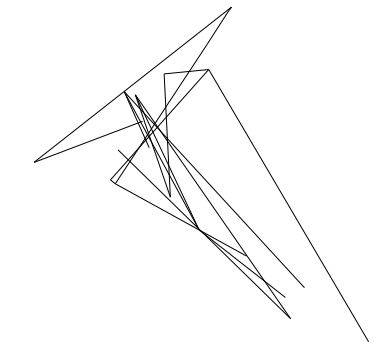

    After 20 iterations
        Discriminator Loss                         = 0.030784714967

    Generator_Loss: -0.289660960436
676
    After 20 iterations
        Discriminator Loss                         = 0.0326768569648

    Generator_Loss: -0.278820335865
677
    After 20 iterations
        Discriminator Loss                         = -0.00124055705965

    Generator_Loss: -0.300938040018
678
    After 20 iterations
        Discriminator Loss                         = 0.065251275897

    Generator_Loss: -0.306282192469
679
    After 20 iterations
        Discriminator Loss                         = 0.0089311376214

    Generator_Loss: -0.281206905842
680
    After 20 iterations
        Discriminator Loss                         = 0.0251295100898

    Generator_Loss: -0.274039030075
681
    After 20 iterations
        Discriminator Loss                         = 0.00958518311381

    Generator_Loss: -0.269149541855
682
    After 20 iterations
        Discriminator Loss           

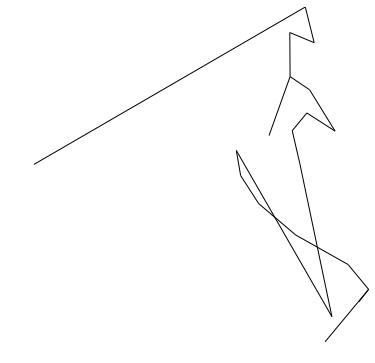

    After 20 iterations
        Discriminator Loss                         = -0.0197357628495

    Generator_Loss: -0.0302073061466
701
    After 20 iterations
        Discriminator Loss                         = -0.0676679164171

    Generator_Loss: -0.0150628844276
702
    After 20 iterations
        Discriminator Loss                         = 0.0220016501844

    Generator_Loss: -0.0127149755135
703
    After 20 iterations
        Discriminator Loss                         = -0.0230430960655

    Generator_Loss: -0.00424984516576
704
    After 20 iterations
        Discriminator Loss                         = -0.0746734365821

    Generator_Loss: 0.00293187401257
705
    After 20 iterations
        Discriminator Loss                         = -0.0288214888424

    Generator_Loss: 0.00785539392382
706
    After 20 iterations
        Discriminator Loss                         = -0.0111592952162

    Generator_Loss: 0.0188514161855
707
    After 20 iterations
        Discriminator Los

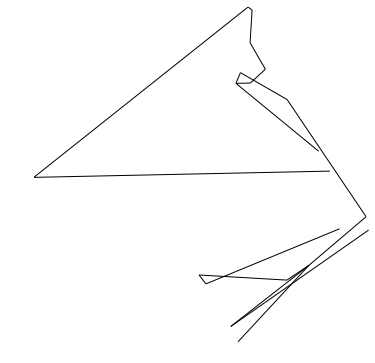

    After 20 iterations
        Discriminator Loss                         = 0.0280220098794

    Generator_Loss: 0.025100370869
726
    After 20 iterations
        Discriminator Loss                         = -0.022265823558

    Generator_Loss: 0.0218922216445
727
    After 20 iterations
        Discriminator Loss                         = 0.0600629448891

    Generator_Loss: 0.0405862107873
728
    After 20 iterations
        Discriminator Loss                         = -0.022935571149

    Generator_Loss: 0.0143555728719
729
    After 20 iterations
        Discriminator Loss                         = -0.0243005305529

    Generator_Loss: 0.0953500643373
730
    After 20 iterations
        Discriminator Loss                         = -0.0269419252872

    Generator_Loss: 0.0799174904823
731
    After 20 iterations
        Discriminator Loss                         = 0.0360632129014

    Generator_Loss: 0.0270648822188
732
    After 20 iterations
        Discriminator Loss           

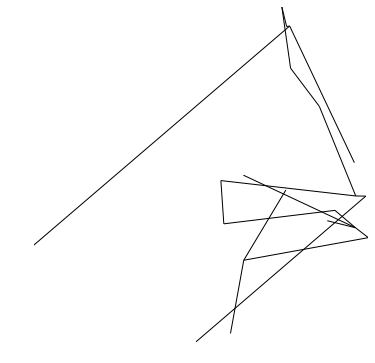

    After 20 iterations
        Discriminator Loss                         = -0.0130658652633

    Generator_Loss: -0.0477194227278
751
    After 20 iterations
        Discriminator Loss                         = -0.0626353845

    Generator_Loss: -0.0614719465375
752
    After 20 iterations
        Discriminator Loss                         = -0.0630863979459

    Generator_Loss: -0.0777728408575
753
    After 20 iterations
        Discriminator Loss                         = -0.0273601152003

    Generator_Loss: -0.0784052684903
754
    After 20 iterations
        Discriminator Loss                         = -0.0346725694835

    Generator_Loss: -0.0678676441312
755
    After 20 iterations
        Discriminator Loss                         = -0.0192845407873

    Generator_Loss: -0.0827408507466
756
    After 20 iterations
        Discriminator Loss                         = -0.0266028102487

    Generator_Loss: -0.0986496955156
757
    After 20 iterations
        Discriminator Loss 

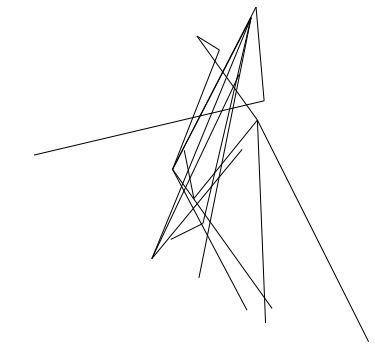

    After 20 iterations
        Discriminator Loss                         = -0.0435000807047

    Generator_Loss: -0.0194955226034
776
    After 20 iterations
        Discriminator Loss                         = 0.000969547312707

    Generator_Loss: -0.0213180668652
777
    After 20 iterations
        Discriminator Loss                         = -0.0499117262661

    Generator_Loss: -0.0303092580289
778
    After 20 iterations
        Discriminator Loss                         = -0.0170224234462

    Generator_Loss: -0.0434159003198
779
    After 20 iterations
        Discriminator Loss                         = 0.0499308891594

    Generator_Loss: -0.0591810680926
780
    After 20 iterations
        Discriminator Loss                         = -0.0122776553035

    Generator_Loss: -0.0798933878541
781


In [7]:
geom_model, cond_geom_model, morph_model, cond_morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint,
                      verbose=True)

In [ ]:
noise_code = np.random.randn(1,1,100)

if rule == 'gmd':
    locations_gen = geom_model[0].predict(noise_code)
    softmax_gen = np.squeeze(cond_morph_model[0].predict([noise_code, locations_gen]))
elif rule == 'mgd':
    softmax_gen = morph_model[0].predict(noise_code)
    locations_gen = cond_geom_model[0].predict([noise_code, softmax_gen])
    softmax_gen = np.squeeze(softmax_gen)

In [ ]:
plt.imshow(softmax_gen, interpolation='none', cmap='Greys')
plt.colorbar()
plt.show()

In [ ]:
neuron_object = train.plot_example_neuron(locations_gen, softmax_gen)
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)

In [ ]:
neuron_object.parent_index

In [ ]:
McNeuron.visualize.plot_dedrite_tree(neuron_object)

In [ ]:
print np.max(training_data['geometry']['n20'][0, :, :]), np.min(training_data['geometry']['n20'][0, :, :])
print locations_gen.max(), locations_gen.min()

In [ ]:
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
neuron_object.fit()
features = neuron_object.features
features.keys()

In [ ]:
import pprint as pp
pp.pprint(features['branch_angle_segment'])

In [ ]:
for ex in range(2200, 2300):
    input_code = dict()
    input_code['morphology'] = training_data['morphology']['n20'][ex, :]
    input_code['geometry'] = np.squeeze(training_data['geometry']['n20'][ex, :, :])
    neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)
    neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
    McNeuron.visualize.plot_2D(neuron_object)
    McNeuron.visualize.plot_dedrite_tree(neuron_object)